# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle that contains information on 3 million used cars.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Used Car Dealership - Business Understanding

We would like identify what factors make a car more or less expensive and suggest the outcome to a used car dealership.

Some factors weigh in as personal preferences such as color and style versus more tangible features like MPG or HP.



_Used Car Dealership would like to understand what factors weigh in pricing a used car. There are highly influential features that directly contribute to the price of a car versus personal preferences. In this study, features will be identified as important and analyzed for multicollinearity. Finally, several models will be built and best model result will be used in the conclusion as outcome. The objective of this study to find out the important features which are making the price of a used car and create a model to estimate price of a used car and share the results with the dealership. A Kaggle dataset is shared for this purpose: Here, price is the target variable and the rest of dataset is features. Categorical features must be converted to numeric features so that they can be utilized in variance inflation factor and feature importance analysis also model creation._

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

The dataset consists of these columns: id, region, price, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, VIN, drive, size, type, paint_color and state. Among those columns id is redundant; region, price and state have data consistency, there is no missing data; the rest of columns have all missing data. Records must be analyzed to remove duplicated information. Analyze all string data objects and come up with a method for each to convert some sort of numeric feature.

Understanding Vehicle Identification number (VIN)
For more information about what VIN is please refer to this wiki page:   [https://en.wikipedia.org/wiki/Vehicle_identification_number](https://en.wikipedia.org/wiki/Vehicle_identification_number).
A VIN consists of Manufacturer, Brand/Model/type, Year, Factory and Serial Number as shown in below image:
![](images/VIN.jpg)
￼
World Manufacturer Identifier
The first three digits of a vehicle’s VIN make up the World Manufacturer Identifier (WMI).
- The first digit defines the country of origin or the final point of assembly of your vehicle.
- The second digit indicates the manufacturer and the region where your vehicle was produced.
- The third digit, when coupled with the first two digits, indicates your vehicle’s type or manufacturing division.
Vehicle Description Section
Digits in position 4 through 9 make up the Vehicle Description Section (VDS).
- The fourth through eighth digits describe your vehicle’s model, body type, restraint system, transmission type, and engine code.
- The ninth digit is the check digit, which is used to detect fraudulent VINs. The number that appears in the ninth position varies and is based on a mathematical formula developed by the U.S. Department of Transportation.
Vehicle Identifier Section
Digits in position 10 through 17 make up the Vehicle Identifier Section (VIS).
- The tenth digit indicates the year, which only applies to vehicles built in or after 1981 since the VIN format was not standardized until that year.

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector, TransformedTargetRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.inspection import permutation_importance
from sklearn import set_config


In [2]:
set_config(display="diagram")

In [3]:
vehicles = pd.read_csv('data/vehicles.csv')

In [4]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
vehicles.describe()

id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07

In [6]:
vehicles

id                  region  price    year manufacturer  \
0       7222695916                prescott   6000     NaN          NaN   
1       7218891961            fayetteville  11900     NaN          NaN   
2       7221797935            florida keys  21000     NaN          NaN   
3       7222270760  worcester / central MA   1500     NaN          NaN   
4       7210384030              greensboro   4900     NaN          NaN   
...            ...                     ...    ...     ...          ...   
426875  7301591192                 wyoming  23590  2019.0       nissan   
426876  7301591187                 wyoming  30590  2020.0        volvo   
426877  7301591147                 wyoming  34990  2020.0     cadillac   
426878  7301591140                 wyoming  28990  2018.0        lexus   
426879  7301591129                 wyoming  30590  2019.0          bmw   

                           model condition    cylinders    fuel  odometer  \
0                            NaN       NaN          NaN     NaN       NaN   
1                            NaN       NaN          NaN     NaN       NaN   
2                            NaN       NaN          NaN     NaN       NaN   
3                            NaN       NaN          NaN     NaN       NaN   
4                            NaN       NaN          NaN     NaN       NaN   
...                          ...       ...          ...     ...       ...   
426875         maxima s sedan 4d      good  6 cylinders     gas   32226.0   
426876  s60 t5 momentum sedan 4d      good          NaN     gas   12029.0   
426877          xt4 sport suv 4d      good          NaN  diesel    4174.0   
426878           es 350 sedan 4d      good  6 cylinders     gas   30112.0   
426879  4 series 430i gran coupe      good          NaN     gas   22716.0   

       title_status transmission                VIN drive size       type  \
0               NaN          NaN                NaN   NaN  NaN        NaN   
1               NaN          NaN                NaN   NaN  NaN        NaN   
2               NaN          NaN                NaN   NaN  NaN        NaN   
3               NaN          NaN                NaN   NaN  NaN        NaN   
4               NaN          NaN                NaN   NaN  NaN        NaN   
...             ...          ...                ...   ...  ...        ...   
426875        clean        other  1N4AA6AV6KC367801   fwd  NaN      sedan   
426876        clean        other  7JR102FKXLG042696   fwd  NaN      sedan   
426877        clean        other  1GYFZFR46LF088296   NaN  NaN  hatchback   
426878        clean        other  58ABK1GG4JU103853   fwd  NaN      sedan   
426879        clean        other  WBA4J1C58KBM14708   rwd  NaN      coupe   

       paint_color state  
0              NaN    az  
1              NaN    ar  
2              NaN    fl  
3              NaN    ma  
4              NaN    nc  
...            ...   ...  
426875         NaN    wy  
426876         red    wy  
426877       white    wy  
426878      silver    wy  
426879         NaN    wy  

[426880 rows x 18 columns]

### Data Exploration and Analysis
    target column is price
    year/manufaturer/model can be used to fill missing cylinders, fuel, transmission, type columns
 


In [7]:
vehicles['size'].value_counts()

full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: size, dtype: int64

In [8]:
vehicles['cylinders'].value_counts()

6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64

In [9]:
vehicles['fuel'].value_counts()

gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: fuel, dtype: int64

In [10]:
vehicles['transmission'].value_counts()

automatic    336524
other         62682
manual        25118
Name: transmission, dtype: int64

In [11]:
vehicles['condition'].value_counts()

good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

In [12]:
vehicles['type'].value_counts()

sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: type, dtype: int64

In [13]:
vehicles['paint_color'].value_counts()

white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: paint_color, dtype: int64

In [14]:
vehicles['title_status'].value_counts()

clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: title_status, dtype: int64

In [15]:
vehicles['odometer'].value_counts()

100000.0    2263
1.0         2246
0.0         1965
200000.0    1728
150000.0    1603
            ... 
149468.0       1
154259.0       1
111887.0       1
213826.0       1
26892.0        1
Name: odometer, Length: 104870, dtype: int64

In [16]:
pd.crosstab(vehicles.cylinders,'cylinders')

col_0         cylinders
cylinders              
10 cylinders       1455
12 cylinders        209
3 cylinders         655
4 cylinders       77642
5 cylinders        1712
6 cylinders       94169
8 cylinders       72062
other              1298

In [17]:
vehicles['type'].dropna().unique().tolist()

['pickup',
 'truck',
 'other',
 'coupe',
 'SUV',
 'hatchback',
 'mini-van',
 'sedan',
 'offroad',
 'bus',
 'van',
 'convertible',
 'wagon']

In [18]:
vehicles[(~vehicles['title_status'].isnull()) & (vehicles['condition'].isnull()) & 
        (vehicles['odometer'] < 1000)]['title_status'].value_counts()

clean         4998
missing         44
salvage         41
rebuilt         34
parts only       8
lien             5
Name: title_status, dtype: int64

In [19]:
vehicles[~vehicles['model'].isnull() & vehicles['drive'].isnull() &
         vehicles['model'].str.contains('wd', case=False)]['model'].value_counts()

mdx sh-awd sport utility    464
mdx sh-awd w/technology     259
rdx sh-awd sport utility     84
rdx sh-awd a-spec pkg        80
f150 xlt 4wd                 77
                           ... 
sorento 4wd                   1
150 4wd                       1
ex35 inifiniti awd            1
sierra 1500 4wd               1
traverse w/lt awd             1
Name: model, Length: 767, dtype: int64

In [20]:
# fill manufacturer from model
vehicles[vehicles['manufacturer'].isnull()]['model'].value_counts()

Scion iM Hatchback 4D             640
smart fortwo Passion Hatchback    168
Genesis G80 3.8 Sedan 4D          163
Freightliner Cascadia             153
International 4300                148
                                 ... 
bentley continental gtc             1
BENTLEY FLYING SPUR                 1
NISSA SENTRA                        1
1992 International 4900             1
Paige Glenbrook Touring             1
Name: model, Length: 6044, dtype: int64

In [21]:
vehicles[~vehicles['model'].isnull() & vehicles['model'].str.contains('scion', case=False)]['model'].value_counts()

Scion iM Hatchback 4D     640
scion xb                  157
scion tc                  157
Scion xD Hatchback 4D     134
Scion xB                  115
                         ... 
SCION XB HATCHBACK          1
Scion xA Hatchback 4D       1
SCION FR-S COUPE            1
scion xa 4dr hatchback      1
2010 Scion XB               1
Name: model, Length: 136, dtype: int64

In [22]:
vehicles[vehicles['manufacturer'] == 'scion']['manufacturer'].value_counts()

Series([], Name: manufacturer, dtype: int64)

In [23]:
vehicles['manufacturer'].value_counts()

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


In [24]:
# Inconsistency in odometer, will be removed later
vehicles[vehicles['odometer'] < 10]['condition'].value_counts()

excellent    1085
good          275
new           125
like new       94
fair           88
salvage        12
Name: condition, dtype: int64

In [25]:
vehicles['condition'].value_counts().count()

6

#### Visual Data Analysis

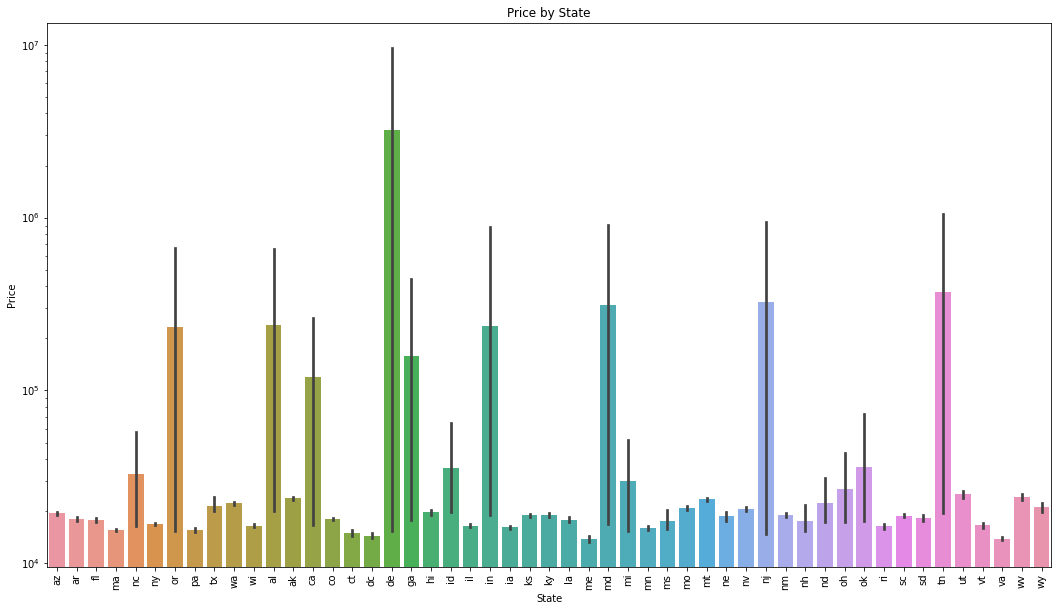

In [26]:
# visualize Price by State
plt.subplots(figsize=(18,10))
sns.barplot( data=vehicles, x='state', y='price', log=True )
plt.title('Price by State')
plt.xlabel('State')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show()

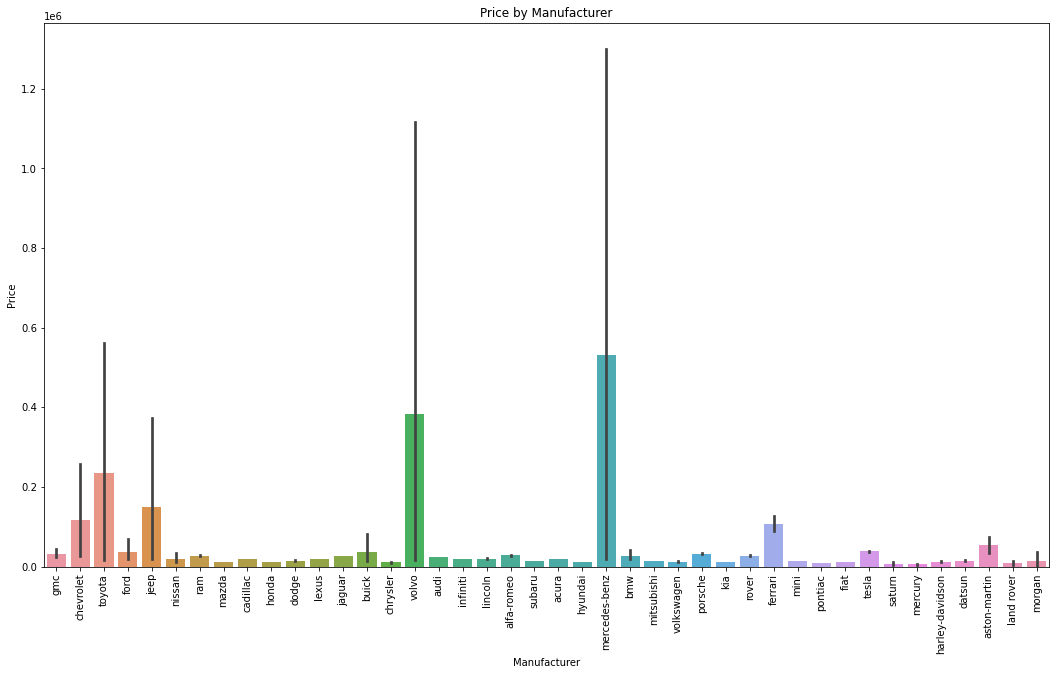

In [27]:
# visualize Price by Manufacturer
plt.subplots(figsize=(18,10))
sns.barplot( data=vehicles, x='manufacturer', y='price' )
plt.title('Price by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show()

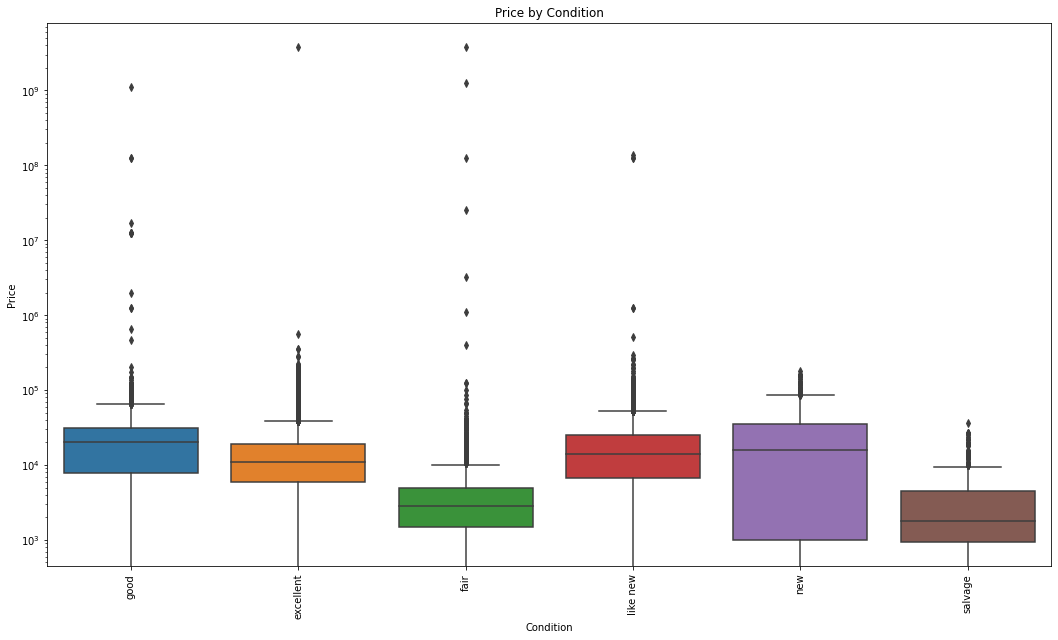

In [28]:
# visualize Price by Condition
plt.subplots(figsize=(18,10))
splot = sns.boxplot( data=vehicles, x='condition', y='price' )
splot.set(yscale='log')
plt.title('Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show()

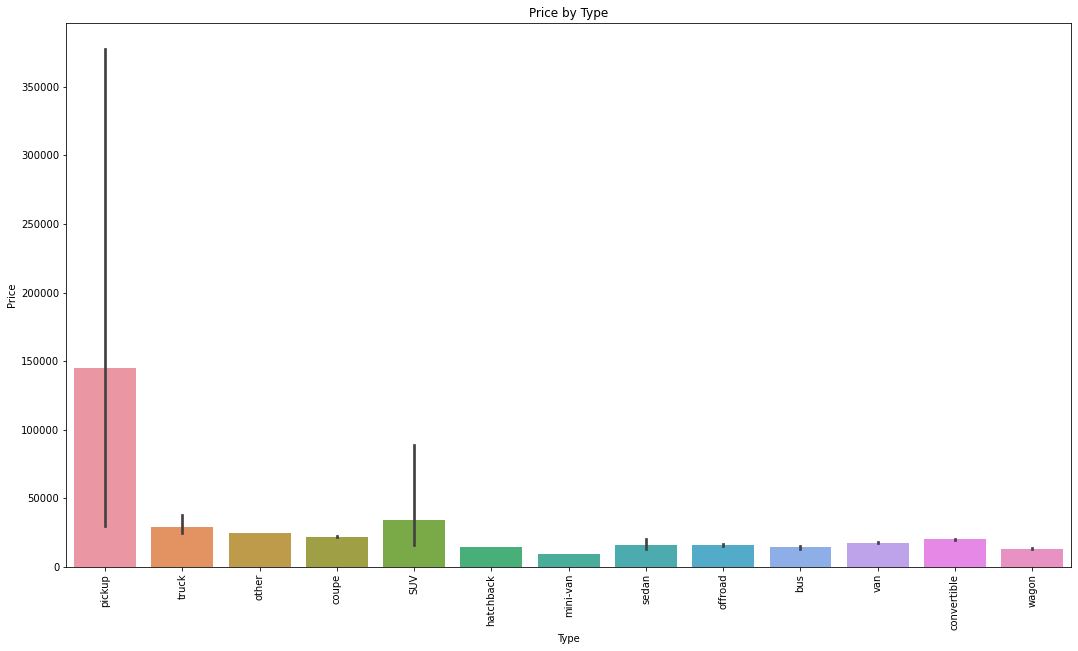

In [29]:
# visualize Price by Type
plt.subplots(figsize=(18,10))
splot = sns.barplot( data=vehicles, x='type', y='price' )
#splot.set(yscale='log')
plt.title('Price by Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show()

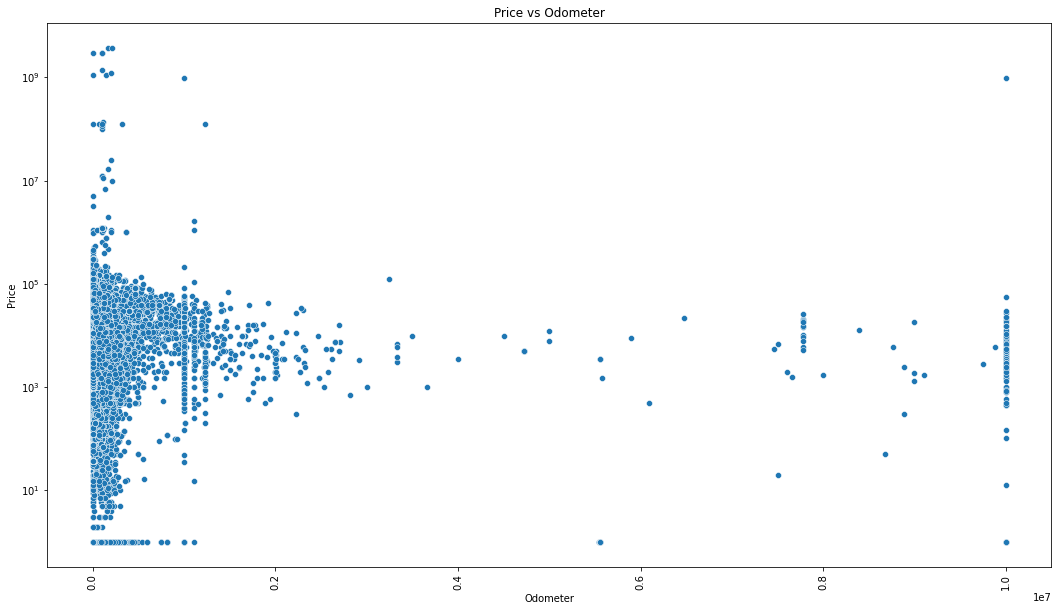

In [30]:
# visualize Price vs Odometer
plt.subplots(figsize=(18,10))
splot = sns.scatterplot( data=vehicles, x='odometer', y='price' )
splot.set(yscale='log')
plt.title('Price vs Odometer')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show()

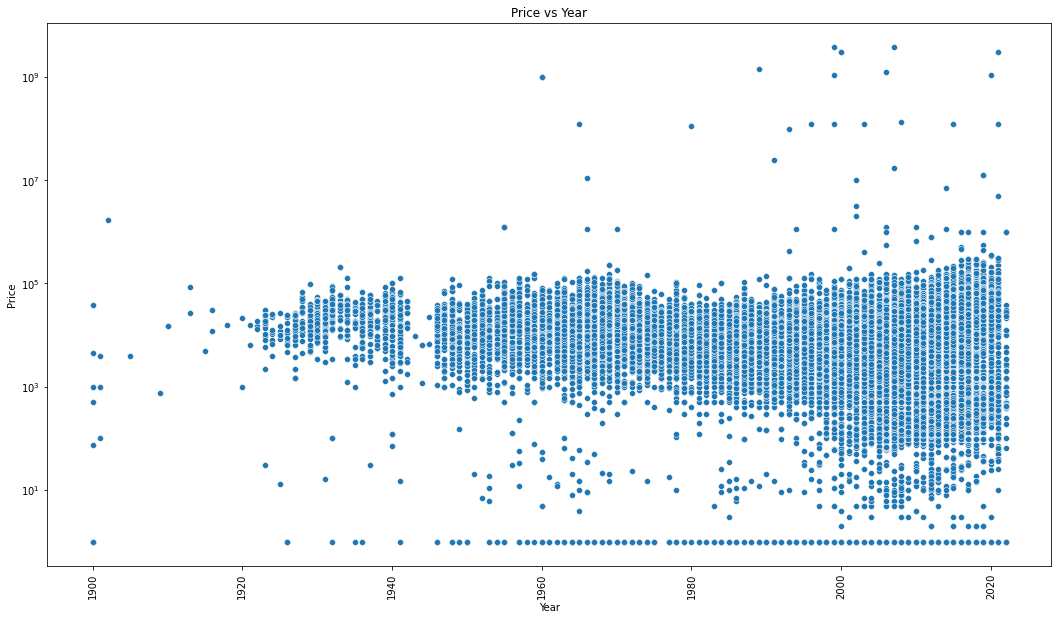

In [31]:
# visualize Price vs Year
plt.subplots(figsize=(18,10))
splot = sns.scatterplot( data=vehicles, x='year', y='price' )
splot.set(yscale='log')
plt.title('Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

Data transformation based per Data Understanding applied here. model column has some free form entries I can utilize to fill missing column values as well as VIN entries reveal some very useful information that I can fill some missing values.

Data correction steps:
- Drop duplicated records if any
- Remove duplicated VIN entries per price, odometer and VIN search
- Nullify VIN entries when they are invalid, containing ‘000000’
- Find out ’scion’ vehicles in model column and set them as ‘Toyota’ in manufacturer column
- Fill 4wd/2wd information from model in drive
- Fill automatic/manual from model in transmission
- Build a known lookup table per feature to fill manufacturer, type, paint color, fuel, size and condition from model
- Build a lookup table of VINs per manufacturer/model and optionally year to fill cylinders, fuel, transmission, drive, size, type, manufacturer, model and year
- Build a known lookup table per feature from model for cross reference of manufacturer/model and optionally year to fill cylinders, fuel, transmission, drive, size and type

Data transformation steps:
- VIN - make it binary 1/0 if exists and drop original VIN column
- Create a regions by states - 6 regions per [https://www.infoplease.com/us/states/regions-of-the-us](https://www.infoplease.com/us/states/regions-of-the-us) 
- replace awd/rwd/fwd with 4wd/2wd - make it binary 1/0
- replace scion with toyota, ram with dodge in manufacturer
- replace manual/automatic with binary 0/1 in transmission
- fix missing condition from title
- Remove all unknown cylinder entries
- Fill paint color with unknown when null

Outliers:
- Remove all entries when price is out of this range ($1100, $249999)
- Remove all entries when odometer is out of this range (0, 9999999) except when condition is new. 
- Remove manufacturer group has a single entry.

Column Cleanup:
- Remove id,city,state,VIN,size,title_status and model columns.

NaN Values:
- Drop all remaining rows with  NaN values.

Convert categorical feature to numerical feature:
- Cylinders as numbers only
- Fuel:
    - vehicles.loc[vehicles['fuel'] == 'gas', 'fuel'] = 1
    - vehicles.loc[vehicles['fuel'] == 'diesel', 'fuel'] = 2
    - vehicles.loc[vehicles['fuel'] == 'hybrid', 'fuel'] = 3
    - vehicles.loc[vehicles['fuel'] == 'electric', 'fuel'] = 4
    - vehicles.loc[vehicles['fuel'] == 'other', 'fuel'] = 5
- Condition:
    - vehicles.loc[vehicles['condition'] == 'new', 'condition'] = 1
    - vehicles.loc[vehicles['condition'] == 'like new', 'condition'] = 2
    - vehicles.loc[vehicles['condition'] == 'excellent', 'condition'] = 3
    - vehicles.loc[vehicles['condition'] == 'good', 'condition'] = 4
    - vehicles.loc[vehicles['condition'] == 'clean', 'condition'] = 5
    - vehicles.loc[vehicles['condition'] == 'fair', 'condition'] = 6
    - vehicles.loc[vehicles['condition'] == 'salvage', 'condition'] = 7
- Type:
    - vehicles.loc[vehicles['type'] == 'sedan', 'type'] = 1
    - vehicles.loc[vehicles['type'] == 'SUV', 'type'] = 2
    - vehicles.loc[vehicles['type'] == 'truck', 'type'] = 3
    - vehicles.loc[vehicles['type'] == 'pickup', 'type'] = 4
    - vehicles.loc[vehicles['type'] == 'coupe', 'type'] = 5
    - vehicles.loc[vehicles['type'] == 'hatchback', 'type'] = 6
    - vehicles.loc[vehicles['type'] == 'wagon', 'type'] = 7
    - vehicles.loc[vehicles['type'] == 'van', 'type'] = 8
    - vehicles.loc[vehicles['type'] == 'convertible', 'type'] = 9
    - vehicles.loc[vehicles['type'] == 'mini-van', 'type'] = 10
    - vehicles.loc[vehicles['type'] == 'offroad', 'type'] = 11
    - vehicles.loc[vehicles['type'] == 'bus', 'type'] = 12
    - vehicles.loc[vehicles['type'] == 'other', 'type'] = 13
- Region:
    - vehicles.loc[vehicles['region'] == 'west', 'region'] = 1
    - vehicles.loc[vehicles['region'] == 'south', 'region'] = 2
    - vehicles.loc[vehicles['region'] == 'midwest', 'region'] = 3
    - vehicles.loc[vehicles['region'] == 'southwest', 'region'] = 4
    - vehicles.loc[vehicles['region'] == 'midatlantic', 'region'] = 5
    - vehicles.loc[vehicles['region'] == 'newengland', 'region'] = 6
- Convert float to int for year, transmission, drive and vin.

Correlation Analysis:
There are very a few observations out of the correlation matrix:
- Priced higher when VIN number exists
- Four wheel drive vehicles priced higher
- Priced higher when fuel type is other than gas
- More the cylinders are priced higher
- Higher the odometer lower the price
- Newer the model higher the price
- Condition, manual/automatic transmission and type of vehicle do not seem play role
- Region has less influence
Also, some cross correlation among features per matrix:
- Newer vehicles tend to have less number of cylinders but more VIN listed in sales
- More number of cylinders if four wheel drive
- Newer models are slightly more four wheel drive
- When VIN is listed odometer has slightly less milage



In [32]:
# First, drop duplicated records
vehicles.drop_duplicates(inplace=True)

In [33]:
# clean up invalid VIN entries if length is not 17
vehicles.loc[(vehicles['VIN'].str.len() != 17), 'VIN'] = np.NaN

In [34]:
#vehicles[~((~vehicles.duplicated(subset=['VIN','price','odometer'])) | vehicles['VIN'].isna() )]

In [35]:
#vehicles.query('VIN == "3GCPWCED5LG130317"')

In [36]:
# count how many duplicated VINs exist so I can remove them:
len(vehicles[~vehicles['VIN'].isna()]) - len(vehicles['VIN'].unique())

146901

#### Clean up duplicated VINs

In [37]:
# Next, drop duplicated records by VIN, there are 146,901 duplicated entries
vehicles = vehicles[(~vehicles.duplicated(subset=['VIN','price','odometer'])) | vehicles['VIN'].isna()].copy()

#### Clean up invalid VINs

In [38]:
# clean up invalid VIN entries
vehicles.loc[(~vehicles['VIN'].isna() & vehicles['VIN'].str.contains('000000')), 'VIN'] = np.NaN

#### Fill Missing Elements

In [39]:
# fill manufacturer for scion, even though it is toyota, may be needed for filling other features below.
scions = (~vehicles['model'].isnull() & vehicles['manufacturer'].isnull() &
         vehicles['model'].str.contains('scion', case=False))
vehicles.loc[scions, 'manufacturer'] = 'scion'
# replace scion with toyota later in data correction!

In [40]:
# fill 'manufacturer' from known VIN matches, build a lookup table for first 3 characters of VIN
vehicles['make'] = vehicles['VIN'].str[0:3]

# drop NaN columns in feature and VIN
# sort it by the most common values per manufacturer first
make = vehicles.dropna(subset=['make', 'manufacturer']).groupby(['make', 'manufacturer']).count().sort_values(
    by='id', ascending=False).reset_index()[['make', 'manufacturer']]

# keep only the first value of manufacturer per 'make' which is actually 'manufacturer' in VIN 
make = make.groupby(['make']).first().reset_index()

# merge data with the lookup dataframe for 'manufacturer'
vehicles = vehicles.merge(make, how='left', on=['make'], suffixes=('', '_right'))

# fill in 'manufacturer' with manufacturer_right
vehicles['manufacturer'].fillna(vehicles['manufacturer_right'], inplace=True)

# drop intermediate columns
vehicles.drop(['manufacturer_right', 'make'], axis=1, inplace=True)

In [41]:
# fill 'size'
vehicles.loc[~vehicles['model'].isnull() & vehicles['size'].isnull(), 'size'] = \
    vehicles[~vehicles['model'].isnull() & vehicles['size'].isnull()
            ]['model'].str.extract('[\w]*(4d|2d)[\w]*', flags=re.IGNORECASE)

In [42]:
# fill 'drive'
vehicles.loc[~vehicles['model'].isnull() & vehicles['drive'].isnull(), 'drive'] = \
    vehicles[~vehicles['model'].isnull() & vehicles['drive'].isnull()
            ]['model'].str.extract('[\w]*(awd|4wd|2wd|fwd|rwd)[\w]*', flags=re.IGNORECASE)

In [43]:
# fill 'transmission'
vehicles.loc[~vehicles['model'].isnull() & vehicles['transmission'].isnull(), 'transmission'] = \
    vehicles[~vehicles['model'].isnull() & vehicles['transmission'].isnull()
            ]['model'].str.extract('[\w]*(automatic|manual)[\w]*', flags=re.IGNORECASE)

In [44]:
# build a feture list
# search and fill feature from model
def feature_from_model(data, feature):
    # build a 'category' list to search in model!
    flist = data[feature].dropna().unique().tolist()
    # remove 'other' from the list if any
    if 'other' in flist:
        flist.remove('other')
    # search and fill 'category' from model
    data.loc[(~data['model'].isnull() & (data[feature].isnull() | data[feature] == 'other') ), feature] = \
                data[(~data['model'].isnull() & (data[feature].isnull() |
                data[feature] == 'other') )]['model'].str.extract(
                "[\w]*(" + "|".join(flist) +")[\w]*", flags=re.IGNORECASE, expand=False).str.lower()
    return data[feature]

In [45]:
# fill missing values from model description if found
vehicles['manufacturer'] = feature_from_model(vehicles, 'manufacturer')
vehicles['type'] = feature_from_model(vehicles, 'type')
vehicles['paint_color'] = feature_from_model(vehicles, 'paint_color')
vehicles['fuel'] = feature_from_model(vehicles, 'fuel')
vehicles['size'] = feature_from_model(vehicles, 'size')
vehicles['condition'] = feature_from_model(vehicles, 'condition')

In [46]:
#vehicles['manufacturer']

In [47]:
# a function to fill missing features by VIN make, model, year
def fill_feature_by_vin(data, feature):
    # build a lookup dataframe with columns just [vehicles['VIN'].str[0:8]+vehicles['VIN'].str[9], feature]
    # make a key from VIN per make, brand, year
    data['key1'] = data['VIN'].str[0:8]+data['VIN'].str[9]
    # drop NaN columns in feature and VIN
    # sort it by the most common values per feature first
    dff1 = data.dropna(subset=['key1', feature]).groupby(['key1', feature]).count().sort_values(
        by='id', ascending=False).reset_index()[['key1', feature]]

    # keep only the first value of feature per 'key1' which is year', 'manufacturer', 'model' 
    dff1 = dff1.groupby(['key1']).first().reset_index()

    # generalize by removing 'year' for second attempt!
    dff2 = dff1
    # make a key from VIN per make, brand without year
    dff2['key2'] = dff2['key1'].str[0:8]
    dff2 = dff2[['key2', feature]].groupby(['key2']).first().reset_index()

    # merge data with the lookup dataframe for features for 1st attempt
    data = data.merge(dff1, how='left', on=['key1'], suffixes=('', '_right1'))

    # merge data with the lookup dataframe for features for 2nd attempt
    data = data.merge(dff2, how='left', on=['key2'], suffixes=('', '_right2'))

    # if 'other' reset value in feature and fill from model mappings
    data.loc[data[feature] == 'other', feature] = np.NaN
    
    # fill in feature with feature_right1 - 1st attempt
    data[feature].fillna(data[feature+'_right1'], inplace=True)

    # fill in feature with feature_right2 - 2nd attempt if feature not year
    if feature != 'year':
        data[feature].fillna(data[feature+'_right2'], inplace=True)

    # drop feature_right1 and 2
    data.drop([feature+'_right1', feature+'_right2', 'key1', 'key2'], axis=1, inplace=True)
    return data

In [48]:
# complete missing values from identical vehicles by matching 'year', 'manufacturer' and 'model',
# or 'manufacturer' and 'model' for second attempt if 'year' does not match up!
vehicles = fill_feature_by_vin(vehicles, 'cylinders')
vehicles = fill_feature_by_vin(vehicles, 'fuel')
vehicles = fill_feature_by_vin(vehicles, 'transmission')
vehicles = fill_feature_by_vin(vehicles, 'drive')
vehicles = fill_feature_by_vin(vehicles, 'size')
vehicles = fill_feature_by_vin(vehicles, 'type')
vehicles = fill_feature_by_vin(vehicles, 'manufacturer')
vehicles = fill_feature_by_vin(vehicles, 'model')
vehicles = fill_feature_by_vin(vehicles, 'year')

In [49]:
#vehicles['VIN'].str[0:8]+vehicles['VIN'].str[9]

In [50]:
# Find identical vehicles for a given feature not null and fill it with most common element
# Correct feature values from model when it is 'others' like manual/automatic
def fill_vehicle_feature(data, feature):
    # build a lookup dataframe with columns just ['year', 'manufacturer', 'model', feature]
    # sort it by the most common values per feature first
    dff1 = data.dropna(subset=[feature]).groupby(['year', 'manufacturer', 'model', feature]).count().sort_values(
        by='id', ascending=False).reset_index()[['year', 'manufacturer', 'model', feature]]

    # keep only the first value of feature per 'year', 'manufacturer', 'model'
    dff1 = dff1.groupby(['year', 'manufacturer', 'model']).first().reset_index()

    # generalize by removing 'year' for second attempt!
    dff2 = dff1.groupby(['manufacturer', 'model']).first().reset_index()[['manufacturer', 'model', feature]]

    # merge data with the lookup dataframe for features for 1st attempt
    data = data.merge(dff1, how='left', on=['year', 'manufacturer', 'model'], suffixes=('', '_right1'))

    # merge data with the lookup dataframe for features for 2nd attempt
    data = data.merge(dff2, how='left', on=['manufacturer', 'model'], suffixes=('', '_right2'))

    # if 'other' reset value in feature and fill from model mappings
    data.loc[data[feature] == 'other', feature] = np.NaN
    
    # fill in feature with feature_right1 - 1st attempt
    data[feature].fillna(data[feature+'_right1'], inplace=True)

    # fill in feature with feature_right2 - 2nd attempt
    data[feature].fillna(data[feature+'_right2'], inplace=True)

    # drop feature_right1 and 2
    data.drop([feature+'_right1', feature+'_right2'], axis=1, inplace=True)
    return data

In [51]:
# complete missing values from identical vehicles by matching 'year', 'manufacturer' and 'model',
# or 'manufacturer' and 'model' for second attempt if 'year' does not match up!
vehicles = fill_vehicle_feature(vehicles, 'cylinders')
vehicles = fill_vehicle_feature(vehicles, 'fuel')
vehicles = fill_vehicle_feature(vehicles, 'transmission')
vehicles = fill_vehicle_feature(vehicles, 'drive')
vehicles = fill_vehicle_feature(vehicles, 'size')
vehicles = fill_vehicle_feature(vehicles, 'type')

In [52]:
#vehicles.query('paint_color != paint_color')[['model','paint_color']]

#### Data correction
+ VIN - make it binary 1/0 if exists and drop original VIN column
+ Create a regions by states - 6 regions per https://www.infoplease.com/us/states/regions-of-the-us
+ replace awd/rwd/fwd with 4wd/2wd - make it binary 1/0
+ replace scion with toyota, ram with dodge in manufacturer
+ replace manual/automatic with binary 0/1 in transmission
+ fix condition from title

In [53]:
# VIN - make it 1/0 if filled or not and drop VIN column
vehicles.loc[vehicles['VIN'].isna(), 'vin'] = 0
vehicles.loc[~vehicles['VIN'].isna(), 'vin'] = 1

In [54]:
# Rename region to city:
vehicles.rename( columns={"region": "city"}, inplace=True )

# 6 regions
#
# New England:Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, Vermont -> ct,me,ma,nh,ri,vt
# Middle Atlantic:Delaware, Maryland, New Jersey, New York, Pennsylvania -> de,md,nj,ny,pa
# South:Alabama, Arkansas, Florida, Georgia, Kentucky, Louisiana, Mississippi, Missouri, North Carolina,
##.     South Carolina, Tennessee, Virginia, West Virginia -> al,ar,fl,ga,ky,la,ms,mo,nc,sc,tn,va,wv
# Midwest:Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Nebraska, North Dakota, Ohio,
##.     South Dakota, Wisconsin -> il,in,ia,ks,mi,mn,ne,nd,oh,sd,wi
# Southwest:Arizona, New Mexico, Oklahoma, Texas -> az,nm,ok,tx
# West:Alaska, California, Colorado, Hawaii, Idaho, Montana, Nevada, Oregon, Utah, Washington, Wyoming 
##.     -> ak,ca,co,hi,id,mt,nv,or,ut,wa,wy
regions = {**dict.fromkeys(['ct','me','ma','nh','ri','vt'],'newengland'),
           **dict.fromkeys(['de','md','nj','ny','pa','dc'],'midatlantic'),
           **dict.fromkeys(['al','ar','fl','ga','ky','la','ms','mo','nc','sc','tn','va','wv'],'south'),
           **dict.fromkeys(['il','in','ia','ks','mi','mn','ne','nd','oh','sd','wi'],'midwest'),
           **dict.fromkeys(['az','nm','ok','tx'],'southwest'),
           **dict.fromkeys(['ak','ca','co','hi','id','mt','nv','or','ut','wa','wy'],'west')}
# replace and create 6 regions
vehicles['region'] = vehicles['state'].replace(regions)

In [55]:
# replace awd/rwd/fwd with 1 and 0 for 4wd/2wd in drive to make it binary
vehicles['drive'].replace({'awd':1,'rwd':0,'fwd':0,'4wd':1,'2wd':0}, inplace=True)
# fill remaining missing drive values as 2wd
vehicles['drive'].fillna(0, inplace=True)
#vehicles['drive'] = pd.to_numeric(vehicles['drive'])

In [56]:
# replace scion with toyota, ram with dodge
vehicles['manufacturer'].replace({'scion':'toyota', 'ram':'dodge'}, inplace=True)

In [57]:
# replace manual/automatic/other with 0, 1 and -1 respectively.
vehicles['transmission'].replace({'automatic':1,'manual':0,'other':-1}, inplace=True)

In [58]:
#fix condition from title!
# %%timeit -n 1000
vehicles['condition'].fillna(vehicles['title_status'], inplace=True)

In [59]:
#vehicles['title_status'].value_counts(),vehicles['condition'].unique()

In [60]:
# set vehicle condition properly for copied values from title status
vehicles.loc[vehicles['condition'].isin(['rebuilt', 'parts only']), 'condition'] = 'salvage'
vehicles.loc[vehicles['condition'].isin(['lien', 'missing']), 'condition'] = np.NaN

In [61]:
# remove 'other' in cylinders, no use of it when unknown!
vehicles.loc[(vehicles['cylinders'] == 'other'), 'cylinders'] = np.NaN

In [62]:
#vehicles[vehicles['condition'].isin(['rebuilt', 'parts only'])]

In [63]:
# divide odometer by 1000, make smaller footprint
#vehicles['odometer'] = vehicles['odometer'] / 1000

In [64]:
# divide price by 1000, make smaller footprint
#vehicles['price'] = vehicles['price'] / 1000

#### Remove Outliers, Wrong Entries

In [65]:
# Keep all records between $1101 and $249999 in price
vehicles = vehicles[(vehicles['price'] > 1100) & (vehicles['price'] < 250_000)]

# IQR for outliers
first_quartile = vehicles['price'].quantile(0.25)
third_quartile = vehicles['price'].quantile(0.75)

iqr = third_quartile - first_quartile

lower = first_quartile - 1.5*iqr
upper = third_quartile + 1.5*iqr
lower, upper

(-16747.5, 45232.5)

In [66]:
# Remove all records with 0 values in odometer - except when 'new'
# Also, remove anything above 1M in odometer
vehicles = vehicles[((vehicles['odometer'] > 0) | (vehicles['condition'] == 'new')) &
                    (vehicles['odometer'] < 9_999_999)]

In [67]:
# year = 2011
# vehicles.query('year == @year and manufacturer == "jeep" and model == "compass" and transmission == transmission')
#vehicles.query('condition == "clean" and odometer < 100 and year > 2020 and cylinders == "other"')

#### Fill with default values

In [68]:
# fill features with deafult values
# paint color - unknown
vehicles['paint_color'].fillna('unknown', inplace=True)
# cylinders - other 
# vehicles['cylinders'].fillna('other', inplace=True)
# type - other 
# vehicles['type'].fillna('other', inplace=True)

In [69]:
# drop unnecesary columns
vehicles.drop(columns=['id','city','state','VIN','size','title_status','model'], axis=1, inplace=True)

#### Drop NaN Records

In [70]:
# remove null entries from the dataset
vehicles.dropna(inplace=True)

#### Convert categorical values to features

In [71]:
# cylinders, just keep number of cylinders
vehicles['cylinders'] = vehicles['cylinders'].str.split().str[0]
vehicles['cylinders'] = pd.to_numeric(vehicles['cylinders'])

In [72]:
# fuel
#vehicles['fuel'].value_counts()
vehicles.loc[vehicles['fuel'] == 'gas', 'fuel'] = 1
vehicles.loc[vehicles['fuel'] == 'diesel', 'fuel'] = 2
vehicles.loc[vehicles['fuel'] == 'hybrid', 'fuel'] = 3
vehicles.loc[vehicles['fuel'] == 'electric', 'fuel'] = 4
vehicles.loc[vehicles['fuel'] == 'other', 'fuel'] = 5
vehicles['fuel'] = pd.to_numeric(vehicles['fuel'])

In [73]:
# condition
#vehicles['condition'].value_counts()
vehicles.loc[vehicles['condition'] == 'new', 'condition'] = 1
vehicles.loc[vehicles['condition'] == 'like new', 'condition'] = 2
vehicles.loc[vehicles['condition'] == 'excellent', 'condition'] = 3
vehicles.loc[vehicles['condition'] == 'good', 'condition'] = 4
vehicles.loc[vehicles['condition'] == 'clean', 'condition'] = 5
vehicles.loc[vehicles['condition'] == 'fair', 'condition'] = 6
vehicles.loc[vehicles['condition'] == 'salvage', 'condition'] = 7
vehicles['condition'] = pd.to_numeric(vehicles['condition'])

In [74]:
# type
#vehicles['type'].value_counts()
vehicles.loc[vehicles['type'] == 'sedan', 'type'] = 1
vehicles.loc[vehicles['type'] == 'SUV', 'type'] = 2
vehicles.loc[vehicles['type'] == 'truck', 'type'] = 3
vehicles.loc[vehicles['type'] == 'pickup', 'type'] = 4
vehicles.loc[vehicles['type'] == 'coupe', 'type'] = 5
vehicles.loc[vehicles['type'] == 'hatchback', 'type'] = 6
vehicles.loc[vehicles['type'] == 'wagon', 'type'] = 7
vehicles.loc[vehicles['type'] == 'van', 'type'] = 8
vehicles.loc[vehicles['type'] == 'convertible', 'type'] = 9
vehicles.loc[vehicles['type'] == 'mini-van', 'type'] = 10
vehicles.loc[vehicles['type'] == 'offroad', 'type'] = 11
vehicles.loc[vehicles['type'] == 'bus', 'type'] = 12
vehicles.loc[vehicles['type'] == 'other', 'type'] = 13
vehicles['type'] = pd.to_numeric(vehicles['type'])

In [75]:
# region - 6 regions
#vehicles['region'].value_counts()
vehicles.loc[vehicles['region'] == 'west', 'region'] = 1
vehicles.loc[vehicles['region'] == 'south', 'region'] = 2
vehicles.loc[vehicles['region'] == 'midwest', 'region'] = 3
vehicles.loc[vehicles['region'] == 'southwest', 'region'] = 4
vehicles.loc[vehicles['region'] == 'midatlantic', 'region'] = 5
vehicles.loc[vehicles['region'] == 'newengland', 'region'] = 6
vehicles['region'] = pd.to_numeric(vehicles['region'])

In [76]:
# convert float to int
vehicles = vehicles.astype({"year":'int', "transmission":'int', "drive":'int', "vin":'int'})

In [77]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230454 entries, 27 to 284593
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         230454 non-null  int64  
 1   year          230454 non-null  int64  
 2   manufacturer  230454 non-null  object 
 3   condition     230454 non-null  int64  
 4   cylinders     230454 non-null  int64  
 5   fuel          230454 non-null  int64  
 6   odometer      230454 non-null  float64
 7   transmission  230454 non-null  int64  
 8   drive         230454 non-null  int64  
 9   type          230454 non-null  int64  
 10  paint_color   230454 non-null  object 
 11  vin           230454 non-null  int64  
 12  region        230454 non-null  int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 24.6+ MB


#### Keep records if there are more than one sample per manufacturer

In [78]:
# Remove single entries per manufacturer
# vehicles.query('manufacturer == "morgan"') which has single entry
vehicles = vehicles[vehicles.groupby(['manufacturer'])['manufacturer'].transform('count') > 1]

In [79]:
# Reset index, start from 0
vehicles.reset_index(drop=True, inplace=True)

In [80]:
vehicles.sort_values('odometer')

price  year manufacturer  condition  cylinders  fuel   odometer  \
29402   35105  2020         ford          1          4     1        0.0   
171198  75110  2021    chevrolet          1          8     2        0.0   
207281  34999  2021         ford          1          4     1        0.0   
219124  20998  2021   mitsubishi          1          4     1        0.0   
187327  20000  1933         ford          1          8     1        0.0   
...       ...   ...          ...        ...        ...   ...        ...   
8499     1750  1991         ford          4          8     1  8000000.0   
19844   13000  1965    chevrolet          5          8     1  8393929.0   
157015   1900  1984    chevrolet          6          8     1  9000000.0   
150008   1750  2002       subaru          4          4     1  9099999.0   
14627    2800  1998          gmc          6          8     1  9750924.0   

        transmission  drive  type paint_color  vin  region  
29402              1      0     9     unknown    1       1  
171198             1      1     3       white    0       4  
207281             1      0     3        grey    0       4  
219124             1      0     7      silver    1       1  
187327             1      0     9      custom    0       6  
...              ...    ...   ...         ...  ...     ...  
8499               0      1     4        grey    0       4  
19844              1      0     5     unknown    0       1  
157015             1      0     4        blue    0       5  
150008             1      1     7       green    0       5  
14627              1      0     2       white    0       1  

[230453 rows x 13 columns]

#### Data Correlation Analysis

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'fuel'}>,
        <AxesSubplot:title={'center':'odometer'}>],
       [<AxesSubplot:title={'center':'transmission'}>,
        <AxesSubplot:title={'center':'drive'}>,
        <AxesSubplot:title={'center':'type'}>],
       [<AxesSubplot:title={'center':'vin'}>,
        <AxesSubplot:title={'center':'region'}>, <AxesSubplot:>]],
      dtype=object)

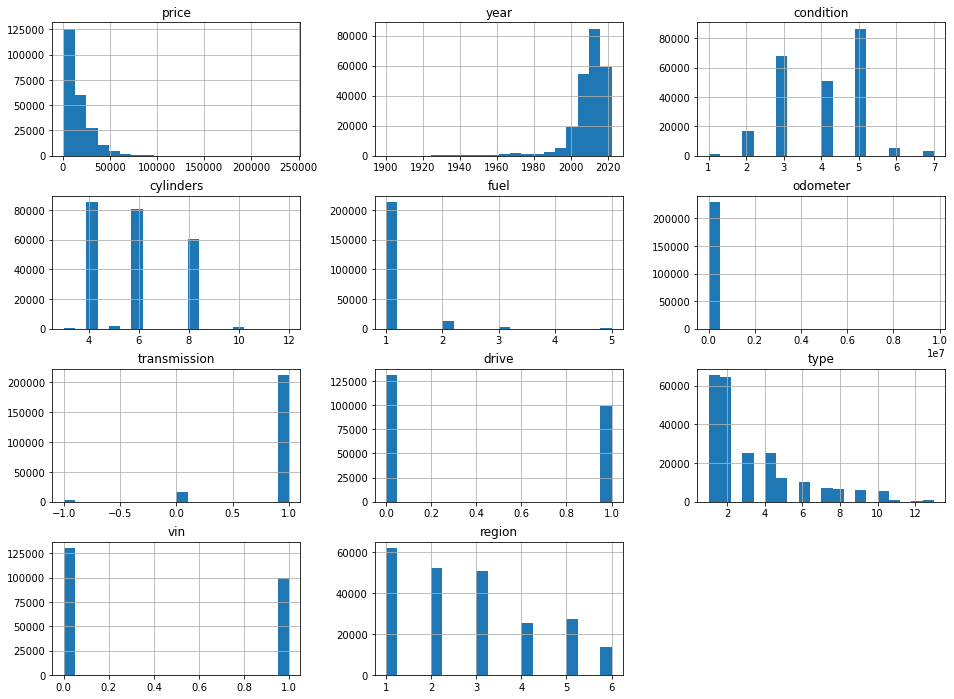

In [81]:
vehicles.hist(bins=20, figsize = (16, 12))

#### Data Exploration

<AxesSubplot:xlabel='price', ylabel='Count'>

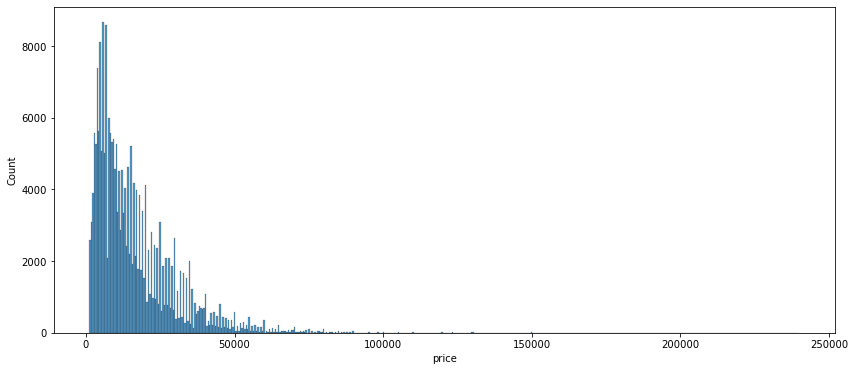

In [82]:
# plot histogram to visualize price distribution
plt.subplots(figsize=(14,6))
sns.histplot(vehicles['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

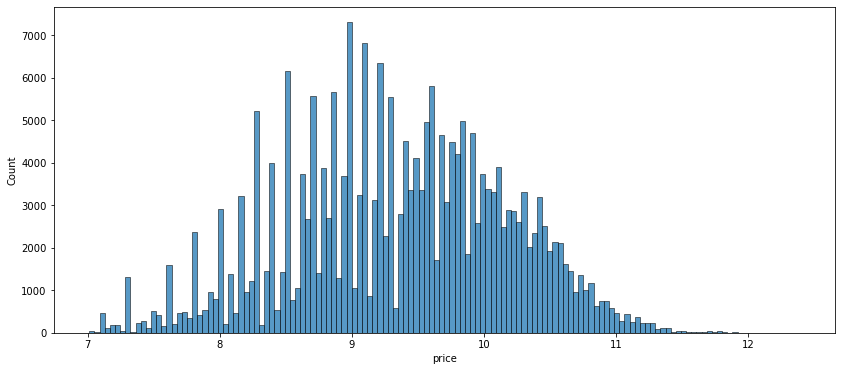

In [83]:
# Since the price is right skewed, there is a long tail towards high-priced cars, do a log transformation
plt.subplots(figsize=(14,6))
sns.histplot(np.log(vehicles['price']))

<AxesSubplot:xlabel='odometer', ylabel='Count'>

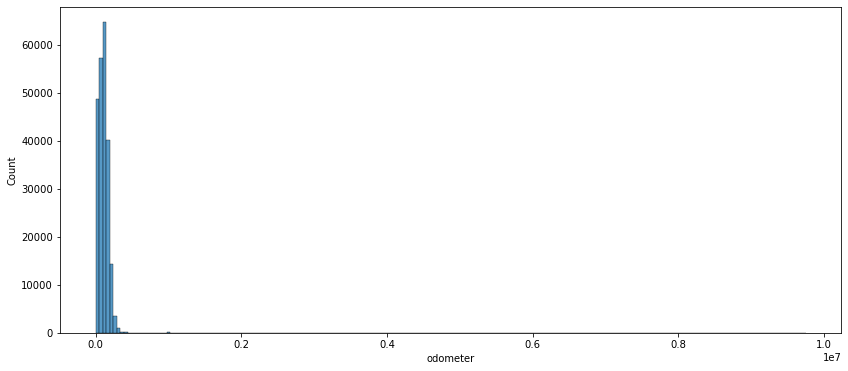

In [84]:
# plot histogram to visualize odometer distribution
plt.subplots(figsize=(14,6))
sns.histplot(vehicles['odometer'], bins=200)

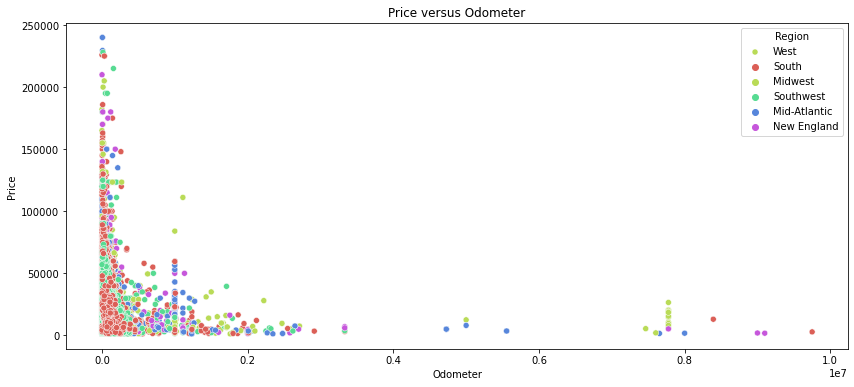

In [85]:
plt.subplots(figsize=(14,6))
sns.scatterplot(data=vehicles, x='odometer', y='price', hue='region', palette = 'hls')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Price versus Odometer')
plt.legend(title='Region', loc='upper right', labels=['West', 'South', 'Midwest', 'Southwest',
                                                      'Mid-Atlantic', 'New England'])

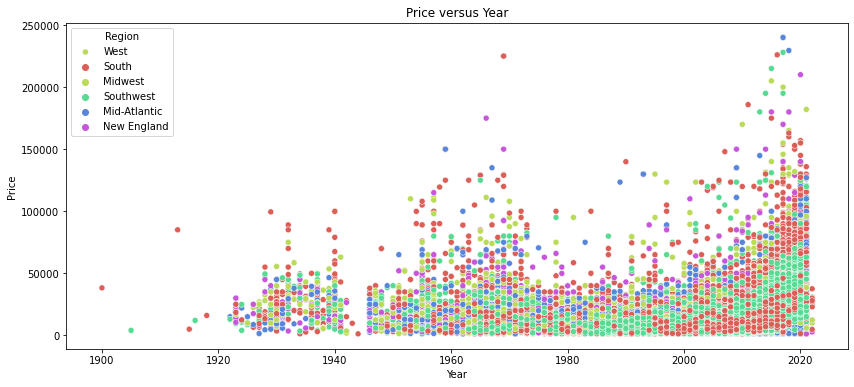

In [86]:
plt.subplots(figsize=(14,6))
sns.scatterplot(data=vehicles, x='year', y='price', hue='region', palette = 'hls')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price versus Year')
plt.legend(title='Region', loc='upper left', labels=['West', 'South', 'Midwest', 'Southwest',
                                                      'Mid-Atlantic', 'New England'])

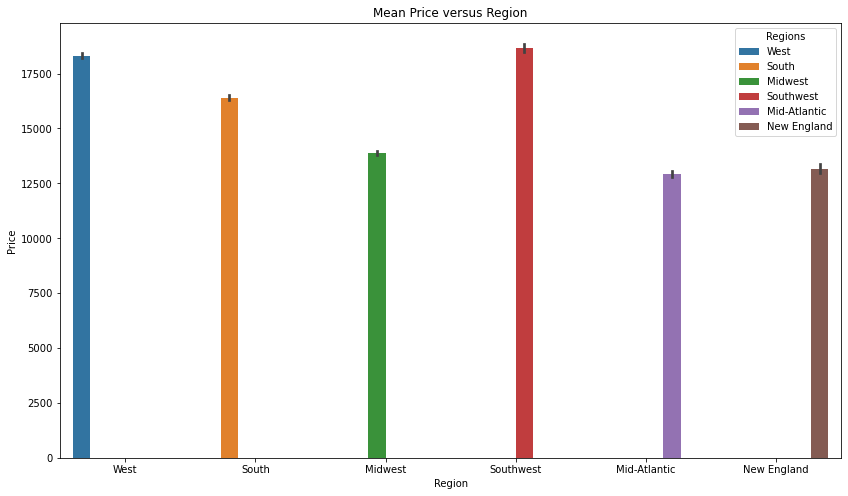

CPU times: user 1.94 s, sys: 14 ms, total: 1.96 s
Wall time: 1.96 s


In [87]:
%%time
# Visualize Price versus Region
plt.subplots(figsize=(14,8))
#splot = sns.barplot(data=vehicles[['region', 'price']].groupby( 'region' ).mean().reset_index(),
splot = sns.barplot(data=vehicles[['region', 'price']], x='region', y='price', hue='region')
plt.xlabel('Region')
plt.ylabel('Price')
plt.title('Mean Price versus Region')
handle, labels = splot.get_legend_handles_labels()
splot.legend(handle, ['West', 'South', 'Midwest', 'Southwest', 'Mid-Atlantic', 'New England'], title='Regions')

splot.set_xticklabels(['West', 'South', 'Midwest', 'Southwest', 'Mid-Atlantic', 'New England'])
plt.show()

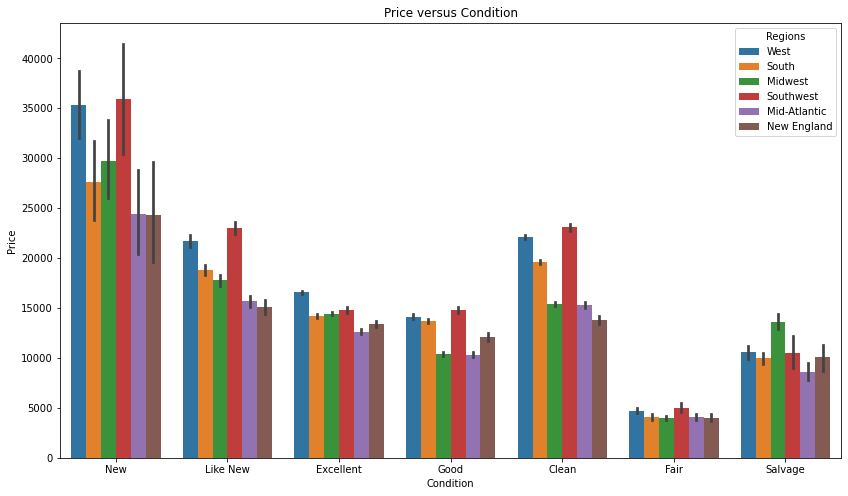

In [88]:
# Visualize Price versus Condition
plt.subplots(figsize=(14,8))
splot = sns.barplot(data=vehicles[['condition', 'region', 'price']], x='condition', y='price', hue='region')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.title('Price versus Condition')
handle, labels = splot.get_legend_handles_labels()
splot.legend(handle, ['West', 'South', 'Midwest', 'Southwest', 'Mid-Atlantic', 'New England'], title='Regions')

splot.set_xticklabels(['New','Like New','Excellent','Good','Clean','Fair','Salvage'])
plt.show()

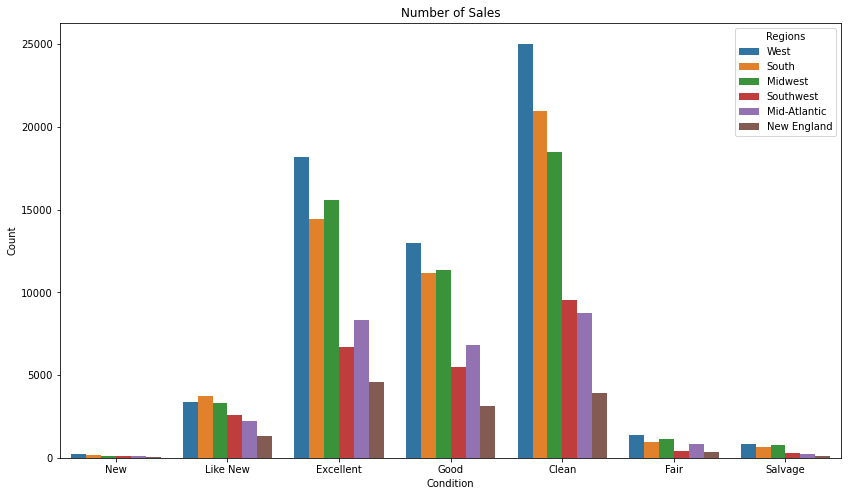

In [89]:
# Visualize Count per Condition
plt.subplots(figsize=(14,8))
splot = sns.countplot(data=vehicles, x='condition', hue='region')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Number of Sales')
handle, labels = splot.get_legend_handles_labels()
splot.legend(handle, ['West', 'South', 'Midwest', 'Southwest', 'Mid-Atlantic', 'New England'], title='Regions')

splot.set_xticklabels(['New','Like New','Excellent','Good','Clean','Fair','Salvage'])
plt.show()

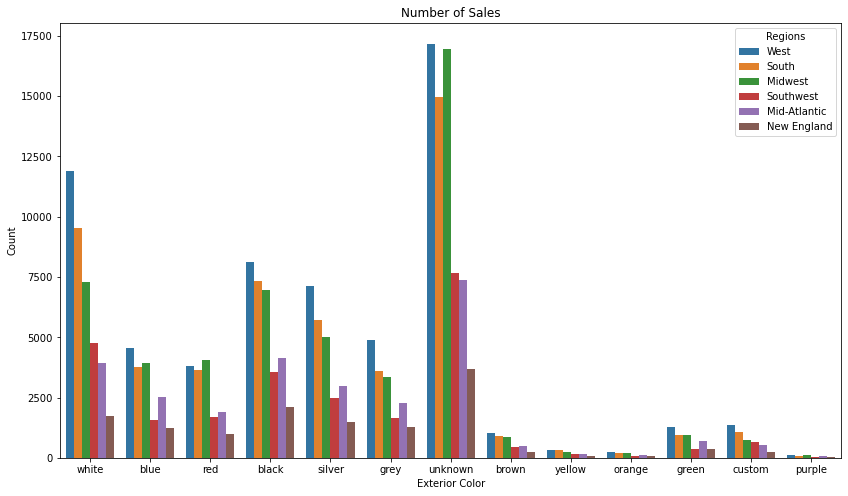

In [90]:
# Visualize Count per Exterior Color
plt.subplots(figsize=(14,8))
splot = sns.countplot(data=vehicles, x='paint_color', hue='region')
plt.xlabel('Exterior Color')
plt.ylabel('Count')
plt.title('Number of Sales')
handle, labels = splot.get_legend_handles_labels()
splot.legend(handle, ['West', 'South', 'Midwest', 'Southwest', 'Mid-Atlantic', 'New England'], title='Regions')
#
plt.show()

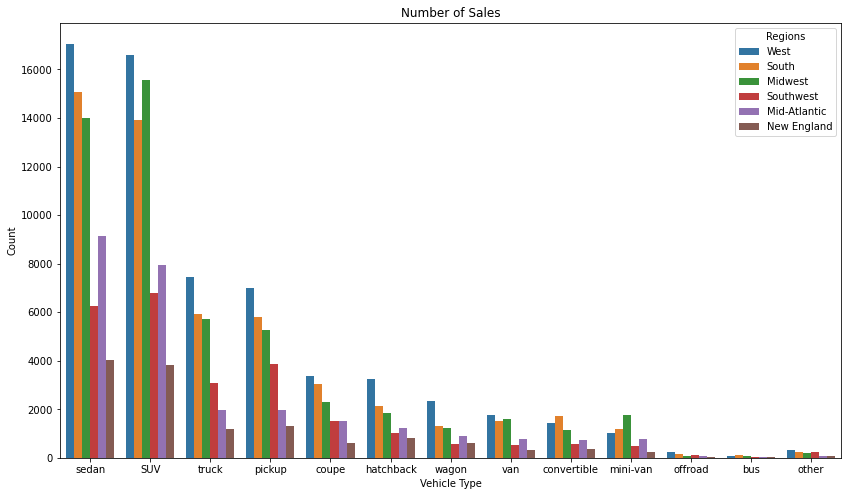

In [91]:
# Visualize Count per Vehicle Type
plt.subplots(figsize=(14,8))
splot = sns.countplot(data=vehicles, x='type', hue='region')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.title('Number of Sales')
handle, labels = splot.get_legend_handles_labels()
splot.legend(handle, ['West', 'South', 'Midwest', 'Southwest', 'Mid-Atlantic', 'New England'], title='Regions')

splot.set_xticklabels(['sedan','SUV','truck','pickup','coupe','hatchback','wagon','van',
                       'convertible','mini-van','offroad','bus','other'])
plt.show()

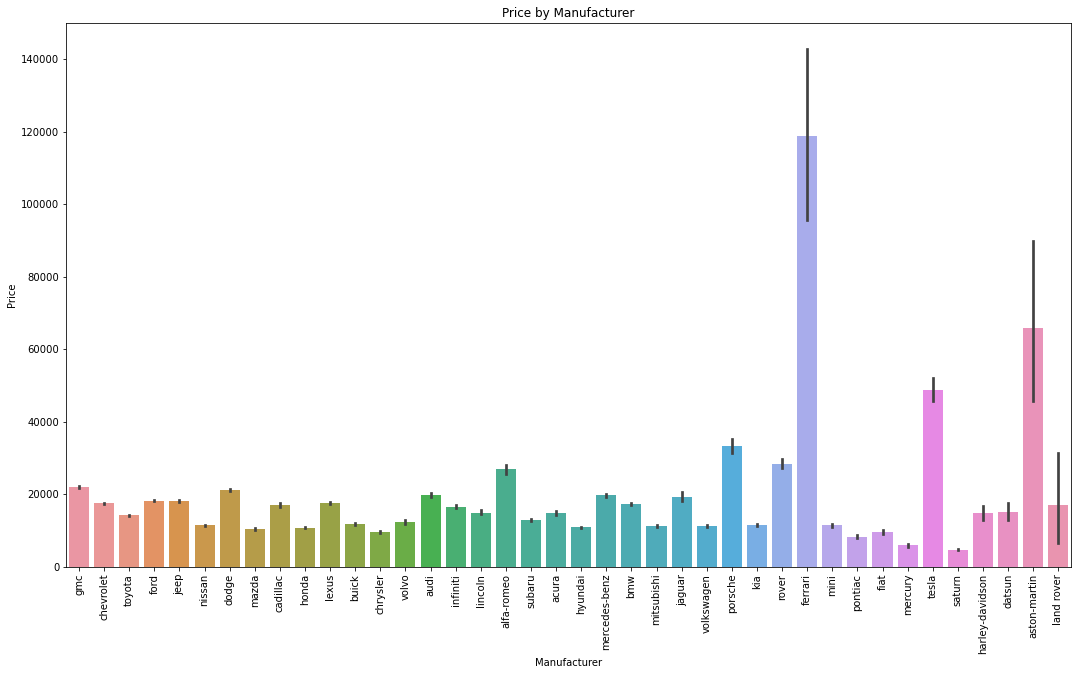

In [92]:
# Visualize Price by Manufacturer
plt.subplots(figsize=(18,10))
sns.barplot( data=vehicles[['manufacturer', 'region', 'price']], x='manufacturer', y='price' )
plt.title('Price by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show()

In [93]:
vehicles.select_dtypes(exclude=np.number).columns

Index(['manufacturer', 'paint_color'], dtype='object')

In [94]:
vehicles.describe()

price           year      condition      cylinders  \
count  230453.000000  230453.000000  230453.000000  230453.000000   
mean    16005.117013    2009.762095       4.008687       5.784928   
std     13631.271451       9.629680       1.089288       1.612200   
min      1109.000000    1900.000000       1.000000       3.000000   
25%      6495.000000    2007.000000       3.000000       4.000000   
50%     11995.000000    2012.000000       4.000000       6.000000   
75%     21583.000000    2016.000000       5.000000       8.000000   
max    239995.000000    2022.000000       7.000000      12.000000   

                fuel      odometer   transmission          drive  \
count  230453.000000  2.304530e+05  230453.000000  230453.000000   
mean        1.098120  1.094408e+05       0.908012       0.431368   
std         0.390975  1.161229e+05       0.323846       0.495268   
min         1.000000  0.000000e+00      -1.000000       0.000000   
25%         1.000000  5.800000e+04       1.000000       0.000000   
50%         1.000000  1.034640e+05       1.000000       0.000000   
75%         1.000000  1.483860e+05       1.000000       1.000000   
max         5.000000  9.750924e+06       1.000000       1.000000   

                type            vin         region  
count  230453.000000  230453.000000  230453.000000  
mean        3.171935       0.433099       2.755577  
std         2.492493       0.495505       1.531680  
min         1.000000       0.000000       1.000000  
25%         1.000000       0.000000       1.000000  
50%         2.000000       0.000000       3.000000  
75%         4.000000       1.000000       4.000000  
max        13.000000       1.000000       6.000000

#### Correlation Analysis

In [95]:
vehicles.corr()

price      year  condition  cylinders      fuel  odometer  \
price         1.000000  0.312673   0.017406   0.271459  0.178035 -0.283769   
year          0.312673  1.000000   0.012784  -0.242776  0.042700 -0.166486   
condition     0.017406  0.012784   1.000000   0.017085  0.019630  0.030329   
cylinders     0.271459 -0.242776   0.017085   1.000000  0.053085  0.090242   
fuel          0.178035  0.042700   0.019630   0.053085  1.000000  0.018770   
odometer     -0.283769 -0.166486   0.030329   0.090242  0.018770  1.000000   
transmission -0.034340  0.152932   0.011922   0.075870 -0.048390  0.035740   
drive         0.270898  0.121133   0.037646   0.274276  0.040514  0.030803   
type          0.084744 -0.121444   0.002285   0.155294  0.071536 -0.001326   
vin           0.209060  0.272132   0.075394  -0.077084  0.030770 -0.121930   
region       -0.108635 -0.016288  -0.062380  -0.015672 -0.031847  0.020289   

              transmission     drive      type       vin    region  
price            -0.034340  0.270898  0.084744  0.209060 -0.108635  
year              0.152932  0.121133 -0.121444  0.272132 -0.016288  
condition         0.011922  0.037646  0.002285  0.075394 -0.062380  
cylinders         0.075870  0.274276  0.155294 -0.077084 -0.015672  
fuel             -0.048390  0.040514  0.071536  0.030770 -0.031847  
odometer          0.035740  0.030803 -0.001326 -0.121930  0.020289  
transmission      1.000000  0.073928 -0.118114 -0.008159  0.014701  
drive             0.073928  1.000000 -0.091640  0.045595  0.034059  
type             -0.118114 -0.091640  1.000000 -0.015528 -0.010970  
vin              -0.008159  0.045595 -0.015528  1.000000 -0.076462  
region            0.014701  0.034059 -0.010970 -0.076462  1.000000

<AxesSubplot:>

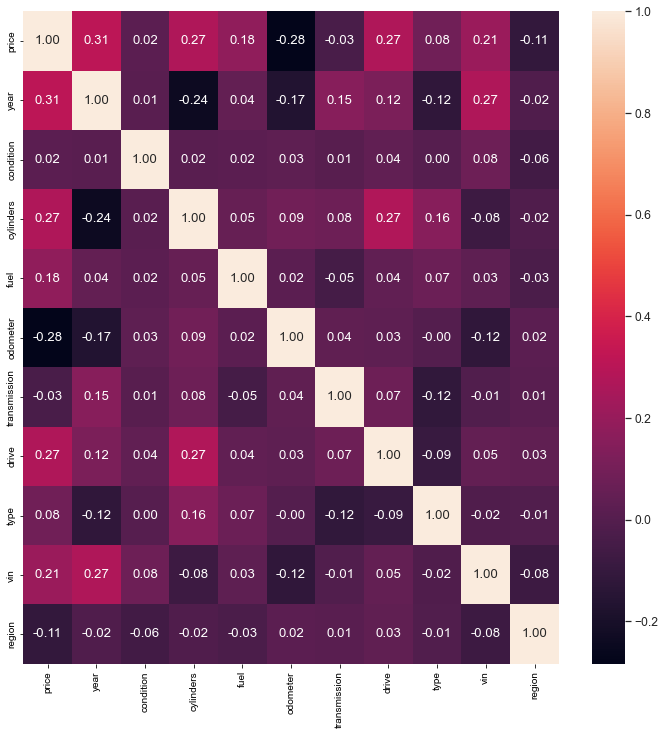

In [96]:
#heatmap
plt.subplots(figsize=(12,12))
sns.set(font_scale=1.1)
sns.heatmap(vehicles.corr(), annot=True, fmt='.2f')

There are very a few observations out of the correlation matrix:
+ Priced higher when VIN number exists
+ Four wheel drive vehicles priced higher
+ Priced higher when fuel type is other than gas
+ More the cylinders are priced higher
+ Higher the odometer lower the price
+ Newer the model higher the price
+ Condition, manual/automatic transmission and type of vehicle do not seem play role
+ Region has less influence

Also, some cross correlation among features per matrix:
+ Newer vehicles tend to have less number of cylinders but more VIN listed in sales
+ More number of cylinders if four wheel drive
+ Newer models are slightly more four wheel drive
+ When VIN is listed odometer has slightly less milage

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'fuel'}>,
        <AxesSubplot:title={'center':'odometer'}>,
        <AxesSubplot:title={'center':'transmission'}>,
        <AxesSubplot:title={'center':'drive'}>],
       [<AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'vin'}>,
        <AxesSubplot:title={'center':'region'}>,
        <AxesSubplot:title={'center':'manufacturer_acura'}>,
        <AxesSubplot:title={'center':'manufacturer_alfa-romeo'}>,
        <AxesSubplot:title={'center':'manufacturer_aston-martin'}>,
        <AxesSubplot:title={'center':'manufacturer_audi'}>,
        <AxesSubplot:title={'center':'manufacturer_bmw'}>],
       [<AxesSubplot:title={'center':'manufacturer_buick'}>,
        <AxesSubplot:title={'center':'manufacturer_cadillac'}>,
        <AxesSubp

<Figure size 432x288 with 0 Axes>

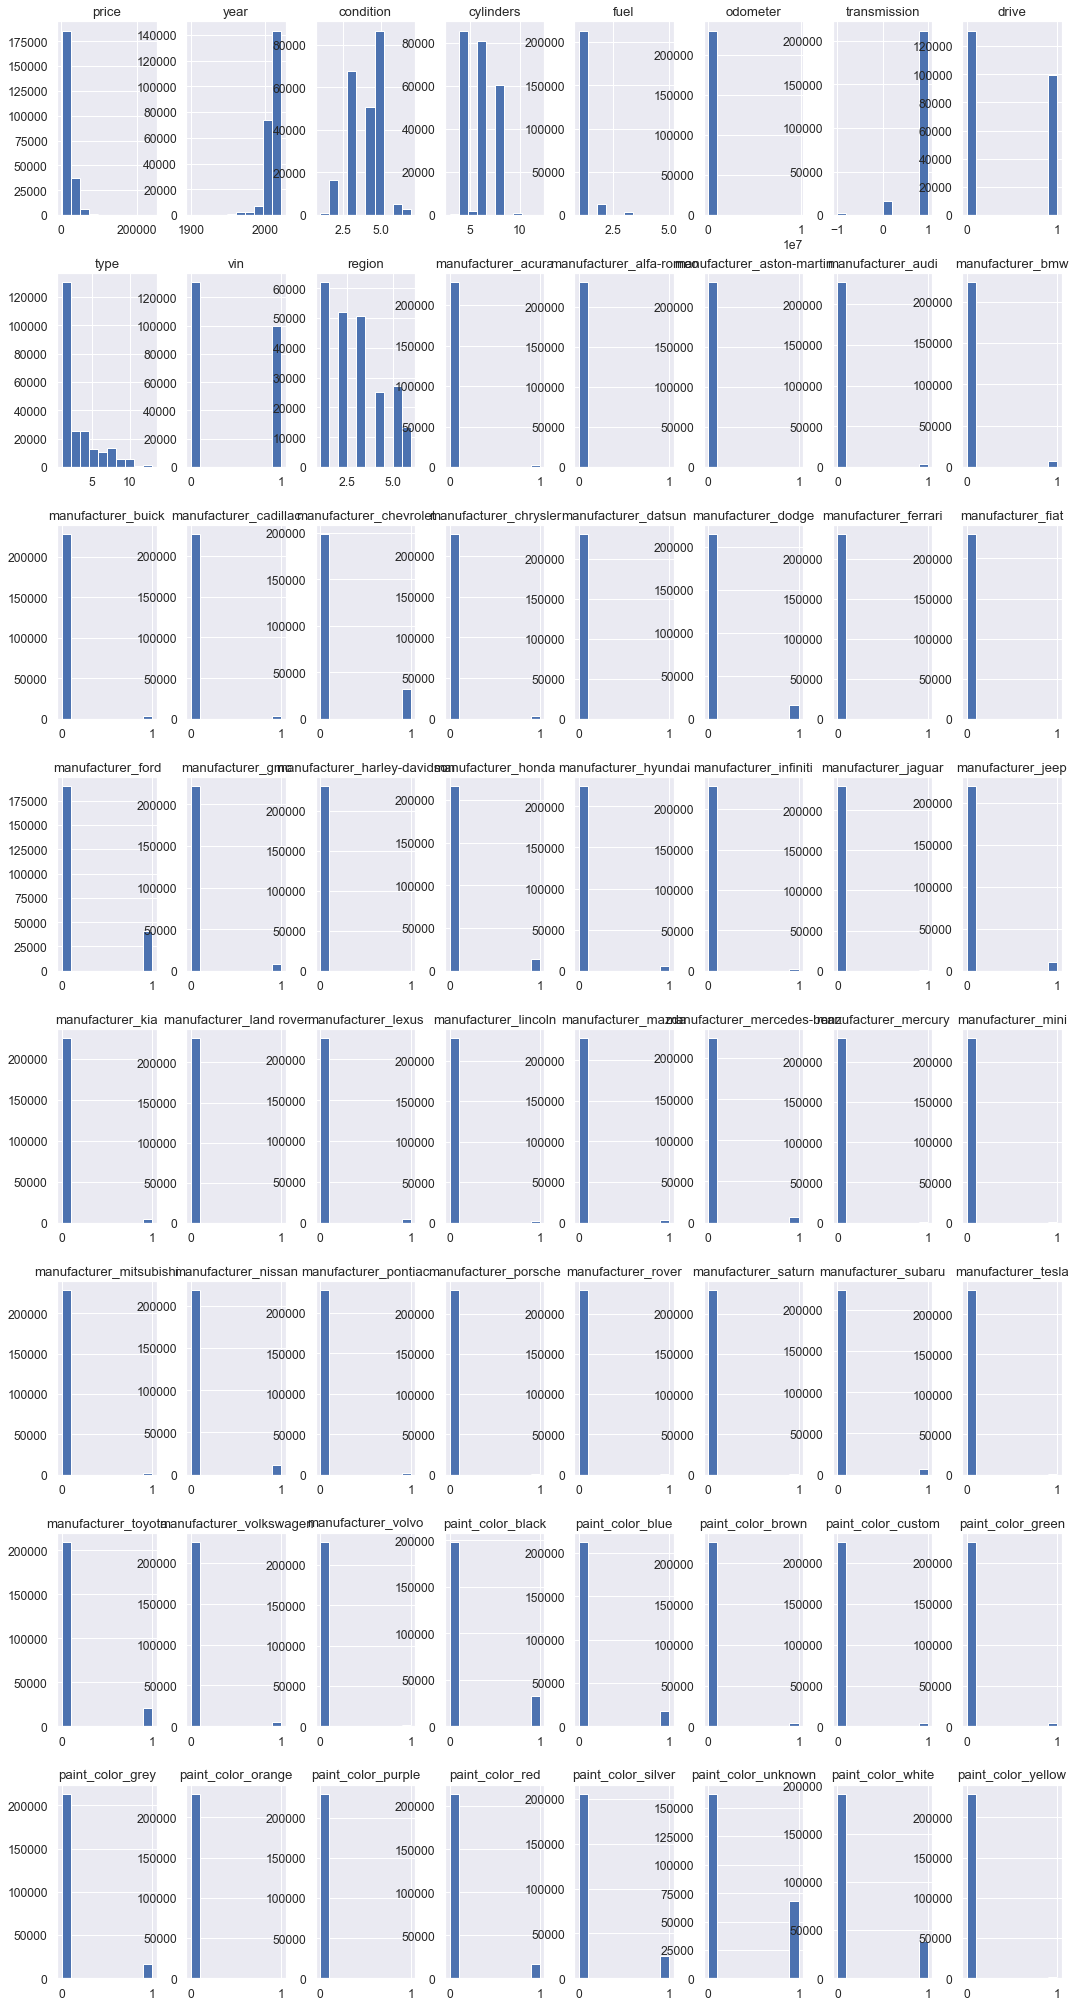

In [97]:
ohe = OneHotEncoder(sparse = False, drop='if_binary')
ohe.fit_transform(vehicles[['manufacturer','paint_color']])
# tranform features and plot histogram
plt.tight_layout()
pd.concat([
    vehicles.select_dtypes(include=np.number),
    pd.DataFrame(ohe.fit_transform(vehicles[['manufacturer','paint_color']]),
             columns=ohe.get_feature_names_out())
]).hist(figsize = (18, 36))

In [98]:
#sns.pairplot(vehicles, kind="reg", diag_kind="kde")

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

**Used Car Modeling**

Before modeling I checked Variance Inflation Factor (VIF) and Permutation Importance. VIF showed no multicollinearity. Permutation Importance interestingly reported condition and region are not influencing models as below:
![](images/ColumnImportance.png)
￼
I only picked up 5 features per permutation importance list: 'year', 'cylinders', 'odometer', 'manufacturer' and 'drive' to build models. Besides, I could include region and condition to categorize properly even though the attribute importance thinks differently per evaluation steps.

I ran a model complexity analysis to decide about degree complexity:
![](images/Complexity2.png)
￼
I kept it at degree=2 for all models. I built 4 models: Ridge, LASSO, Linear Regression and Linear Regression with LASSO feature selection after several evaluations.


In [99]:
# split data
X, y = vehicles.drop(columns='price'), vehicles['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 93, test_size = 0.3)

#### Check VIF: Variance inflation Factor
In order to remove multicollinearity in the dataset
use alpha=10 per findings

In [100]:
# vif
def vif(data):
    columns = data.columns
    vif_dict = {}

    for col in data.select_dtypes(include=np.number).columns:
        exclude_col = [i for i in columns if i != col]
        X,y = data[exclude_col], data[col]

        features = data.select_dtypes(exclude=np.number).columns
        features = [c for c in data.select_dtypes(exclude=np.number).columns if c in data.columns]
        ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough")
        # fit model with training set
        pipe = Pipeline([('transformer', ohe_step),
                         ('scaler', StandardScaler(with_mean=False)),
                         ('ridge', Ridge(alpha = 10)) ])
        # vif = 1 / (1- R^2)
        r_squared = pipe.fit(X, y).score(X, y)
        if r_squared == 1:
            vif = 0
        else:
            vif = 1 / (1-r_squared)
        vif_dict[col] = vif

    df_vif = pd.DataFrame({"VIF":vif_dict}).sort_values(by = "VIF", ascending = False)
    return df_vif

In [101]:
#X.reset_index(drop=True, inplace=True)

In [102]:
# remove multicollienary features above 5 is a suspect per checking correlation matrix
# none of features is a concern in this list
vif(X)

VIF
cylinders     1.761756
drive         1.389629
year          1.330189
type          1.152979
vin           1.133792
transmission  1.091570
condition     1.067025
odometer      1.056281
fuel          1.054887
region        1.019429

#### Check permutation importance for selecting hyperparameters

In [103]:
# permutation importance for hyperparameters
#function to execute permutation importance!
def column_importance(X, y):
    features = [c for c in X.select_dtypes(exclude=np.number).columns if c in X.columns]
    ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough")

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 93, train_size=0.7, test_size=0.3)
    # fit model with training set
    # set alpha to 10 for analyzing importance
    pipe = Pipeline([('transformer', ohe_step),
                     ('scaler', StandardScaler(with_mean=False)),
                     ('ridge', Ridge(alpha = 10)) ])
    model = pipe.fit(X_train, y_train)
    # score with test set
    print('model r^2 :', model.score(X_test, y_test))
    # permutation importance
    r = permutation_importance(model, X_test, y_test, n_repeats = 50, random_state = 93)
    print('importance:', r.importances_mean)
    return model, X_test, y_test, pd.DataFrame({"Column":X.columns, "Importance":r.importances_mean}).sort_values(
        by = "Importance", ascending = False)

In [104]:
%%time
# Per analysis; 'year', 'cylinders', 'odometer' is highly influantial
# 'manufacturer' and drivetrain are next group of influencing features
# vehicle condition, paint color and type are negligible features
model, Xp_test, yp_test, ranking = column_importance(X, y)
ranking

model r^2 : 0.39565962270650357
importance: [2.02722528e-01 4.77532216e-02 1.21204030e-04 1.51406934e-01
 2.91844964e-02 1.11196315e-01 1.67496850e-02 4.52920664e-02
 9.64575713e-03 6.95223332e-03 2.00601017e-02 1.34897797e-02]
CPU times: user 43.8 s, sys: 4.29 s, total: 48.1 s
Wall time: 48.2 s


Column  Importance
0           year    0.202723
3      cylinders    0.151407
5       odometer    0.111196
1   manufacturer    0.047753
7          drive    0.045292
4           fuel    0.029184
10           vin    0.020060
6   transmission    0.016750
11        region    0.013490
8           type    0.009646
9    paint_color    0.006952
2      condition    0.000121

I only pick 5 features per importance list: 'year', 'cylinders', 'odometer', 'manufacturer' and 'drive' from this list to build  models.

Besides, I can include region and condition to categorize properly even though the attribute importance thinks differently.

#### Decide on Model Complexity

In [105]:
%%time
complexity = 4
train_mses = []
test_mses = []
features = X_train.select_dtypes(exclude=np.number).columns
for d in range(1, complexity):
    #create pipeline with PolynomialFeatures degree d 
    ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features) )
    
    pipe = Pipeline([('transformer', ohe_step),
                     ('polyfeatures', PolynomialFeatures(degree = d, include_bias = False)),
                     ('scaler', StandardScaler(with_mean=False)),
                     ('linreg', LinearRegression())])
    #fit on train
    pipe.fit(X_train, y_train)
    #compute mean squared errors
    #predict on train and test
    train_mses.append(mean_squared_error(y_train, pipe.predict(X_train)))
    test_mses.append(mean_squared_error(y_test, pipe.predict(X_test)))
# Answer check
print(pipe.named_steps)
print(train_mses)
print(test_mses)
print(pipe.score(X_test, y_test))
pipe

{'transformer': ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary'),
                                 Index(['manufacturer', 'paint_color'], dtype='object'))]), 'polyfeatures': PolynomialFeatures(degree=3, include_bias=False), 'scaler': StandardScaler(with_mean=False), 'linreg': LinearRegression()}
[165574005.7342159, 163770352.5464059, 163770352.54640588]
[168536487.56581172, 168079747.2196609, 168139347.88687336]
0.09964039674244862
CPU times: user 5.53 s, sys: 157 ms, total: 5.69 s
Wall time: 1.08 s


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  Index(['manufacturer', 'paint_color'], dtype='object'))])),
                ('polyfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler(with_mean=False)),
                ('linreg', LinearRegression())])

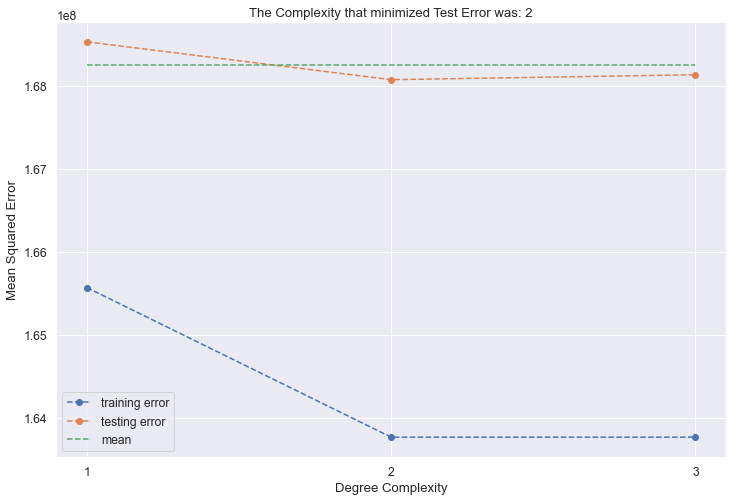

In [106]:
# check effectiveness of complexity!
plt.subplots(figsize=(12,8))
plt.plot(range(1, complexity), train_mses, '--o', label = 'training error')
plt.plot(range(1, complexity), test_mses, '--o', label = 'testing error')
plt.plot(range(1, complexity), [np.mean(test_mses)]*(complexity-1), '--', label = 'mean')
plt.xticks(range(1, complexity), range(1, complexity))
plt.xlabel('Degree Complexity')
plt.ylabel('Mean Squared Error')
plt.title(f'The Complexity that minimized Test Error was: {test_mses.index(min(test_mses)) + 1}')
plt.legend()

Best order of complexity is 2, I will use it in building models below.
#### Use GridSearchCV to find out best Penalty Parameter for Ridge Model

In [107]:
%%time
# Ridge
# 
# Find best alpha for Ridge regressor for degree complexity = 2
alphas = [0.001, 0.01, 1.0, 10.0]
features = X_train.select_dtypes(exclude=np.number).columns
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough" )
pipe = Pipeline([('transformer', ohe_step),
                 ('polyfeatures', PolynomialFeatures(degree = 2, include_bias = False)),
                 ('scaler', StandardScaler(with_mean=False)),
                 ('ttregressor', TransformedTargetRegressor(func=np.log1p,
                                                            inverse_func=np.expm1,
                                                            regressor=Ridge( ))) ])
param_dict = {'ttregressor__regressor__alpha': alphas}
grid = GridSearchCV(pipe, param_grid=param_dict, scoring = 'neg_mean_squared_error')
#grid = GridSearchCV(pipe, param_grid=param_dict)

#fit on train
grid.fit(X_train, y_train)
train_mse = mean_squared_error(y_train, grid.predict(X_train))
test_mse = mean_squared_error(y_test, grid.predict(X_test))
best_alpha = grid.best_params_
# Results
print('Best Alpha:', best_alpha)
print('Score:', grid.score(X_test, y_test))
print('Best Estimator Reults:', grid.best_estimator_)

Best Alpha: {'ttregressor__regressor__alpha': 10.0}
Score: -1.7722965642612042e+17
Best Estimator Reults: Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  Index(['manufacturer', 'paint_color'], dtype='object'))])),
                ('polyfeatures', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler(with_mean=False)),
                ('ttregressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=Ridge(alpha=10.0)))])
CPU times: user 2min 38s, sys: 2.7 s, total: 2min 41s
Wall time: 2min 41s


alpha=10 performs best

In [108]:
grid.best_estimator_.named_steps['ttregressor'].regressor_.coef_

array([-0.13571099,  0.00249396, -0.03070214, ..., -0.81928147,
        0.01453766,  0.01551393])

In [109]:
#grid.best_estimator_.named_steps['ttregressor'].regressor_.

In [110]:
#grid.cv_results_

In [111]:
#pipe[:-1]

In [112]:
#grid.get_params()

#### Base Ridge Model with degree=2 and all features

In [113]:
# Best Ridge as baseline!
features = X_train.select_dtypes(exclude=np.number).columns
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough" )

pipe = Pipeline([('transformer', ohe_step),
                 ('polyfeatures', PolynomialFeatures(degree = 2, include_bias = True)),
                 ('scaler', StandardScaler(with_mean=False)),
                 ('ttregressor', TransformedTargetRegressor(func=np.log1p,
                                                            inverse_func=np.expm1,
                                                            regressor=Ridge(alpha = 10))) ])
#fit on train
pipe.fit(X_train, y_train)
print('Train MSE:', mean_squared_error(y_train, pipe.predict(X_train)))
print('Test MSE :', mean_squared_error(y_test, pipe.predict(X_test)))
print('Train MAE:', mean_absolute_error(y_train, pipe.predict(X_train)))
print('Test MAE :', mean_absolute_error(y_test, pipe.predict(X_test)))
print('Score    :', pipe.score(X_test, y_test))

Train MSE: 133736936.29746291
Test MSE : 2.2868467878518115e+17
Train MAE: 4674.783487479511
Test MAE : 2107198.7582971654
Score    : -1224570269.1347325


In [114]:
# get all transformed feature names
transformed_features = pipe.named_steps['transformer'].get_feature_names_out(X_train.columns)

# remove 'onehotencoder' and 'remainder' prefixes for readability
transformed_features = [str.split(x, sep = '__')[1] for x in transformed_features]

In [115]:

#str.split(transformed_features[0], sep = '__')[1]

In [116]:
# build feature names
feature_names = pipe.named_steps['polyfeatures'].get_feature_names_out(transformed_features)
feature_names

array(['1', 'manufacturer_acura', 'manufacturer_alfa-romeo', ..., 'vin^2',
       'vin region', 'region^2'], dtype=object)

In [117]:
# build a coefficient list to visualize
coefs = pd.DataFrame(
    pipe.named_steps['ttregressor'].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
).sort_values(by='Coefficients', ascending=False)
coefs

Coefficients
year^2                      9.196146
year drive                  3.721293
year transmission           3.177193
year vin                    2.564979
cylinders                   1.724080
...                              ...
year type                  -1.849504
year cylinders             -1.908673
manufacturer_ford year     -2.440998
transmission               -2.554469
year                       -8.927101

[2080 rows x 1 columns]

In [118]:
#pipe.get_params()

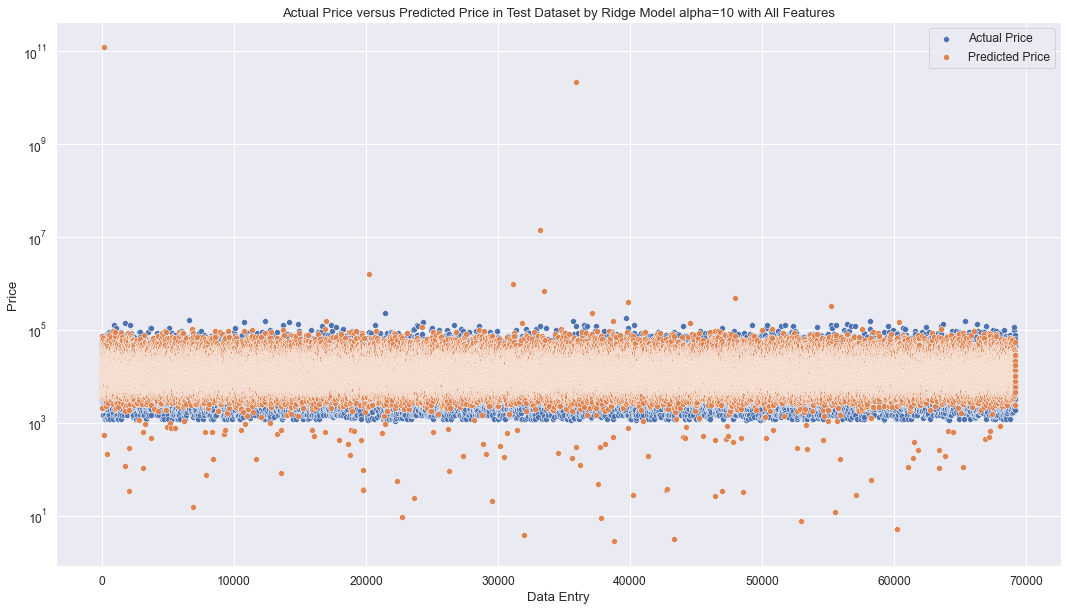

In [119]:
# visualize predicted results
plt.subplots(figsize=(18,10))
splot = sns.scatterplot( x=range(0,len(y_test)), y=y_test, label='Actual Price' )
splot = sns.scatterplot( x=range(0,len(y_test)), y=pipe.predict(X_test), label='Predicted Price' )
splot.set(yscale="log")
plt.title('Actual Price versus Predicted Price in Test Dataset by Ridge Model alpha=10 with All Features')
plt.xlabel('Data Entry')
plt.ylabel('Price')
plt.show()

#### Select only interested features to run models

In [120]:
features_list=['year','cylinders','odometer','manufacturer','drive','region','condition']

#### Ridge Model with No Degree Complexity, alpha=10 and only Top 5 Features

In [121]:
# Best Ridge without complexity degree
features = X_train[features_list].select_dtypes(exclude=np.number).columns
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough" )

pipe = Pipeline([('transformer', ohe_step),
                 ('scaler', StandardScaler(with_mean=False)),
                 ('ttregressor', TransformedTargetRegressor(func=np.log1p,
                                                            inverse_func=np.expm1,
                                                            regressor=Ridge(alpha = 10))) ])
#fit on train
pipe.fit(X_train[features_list], y_train)
print('Train MSE:', mean_squared_error(y_train, pipe.predict(X_train[features_list])))
print('Test MSE :', mean_squared_error(y_test, pipe.predict(X_test[features_list])))
print('Train MAE:', mean_absolute_error(y_train, pipe.predict(X_train[features_list])))
print('Test MAE :', mean_absolute_error(y_test, pipe.predict(X_test[features_list])))
print('Score    :', pipe.score(X_test[features_list], y_test))

Train MSE: 112730759.28959467
Test MSE : 114573093.2728624
Train MAE: 6638.0756281303975
Test MAE : 6684.884138718193
Score    : 0.38647921441594757


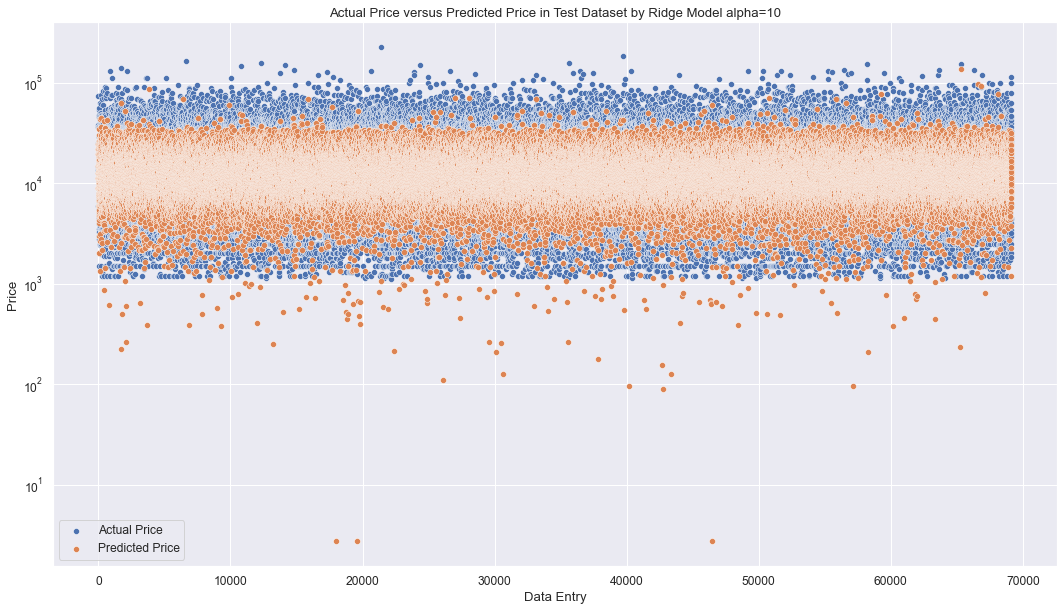

In [122]:
# visualize predicted results
plt.subplots(figsize=(18,10))
splot = sns.scatterplot( x=range(0,len(y_test)), y=y_test, label='Actual Price' )
splot = sns.scatterplot( x=range(0,len(y_test)), y=pipe.predict(X_test[features_list]), label='Predicted Price' )
splot.set(yscale="log")
plt.title('Actual Price versus Predicted Price in Test Dataset by Ridge Model alpha=10')
plt.xlabel('Data Entry')
plt.ylabel('Price')
plt.show()

#### Ridge Model with degree=2, alpha=10 and only 5 top features

In [123]:
# Best Ridge
features = X_train[features_list].select_dtypes(exclude=np.number).columns
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough" )

pipe = Pipeline([('transformer', ohe_step),
                 ('polyfeatures', PolynomialFeatures(degree = 2, include_bias = True)),
                 ('scaler', StandardScaler(with_mean=False)),
                 ('ttregressor', TransformedTargetRegressor(func=np.log1p,
                                                            inverse_func=np.expm1,
                                                            regressor=Ridge(alpha = 10))) ])
#fit on train
pipe.fit(X_train[features_list], y_train)
ridge_train_mse = mean_squared_error(y_train, pipe.predict(X_train[features_list]))
ridge_test_mse = mean_squared_error(y_test, pipe.predict(X_test[features_list]))
ridge_train_mae = mean_absolute_error(y_train, pipe.predict(X_train[features_list]))
ridge_test_mae = mean_absolute_error(y_test, pipe.predict(X_test[features_list]))

print('Train MSE:', ridge_train_mse)
print('Test MSE :', ridge_test_mse)
print('Train MAE:', ridge_train_mae)
print('Test MAE :', ridge_test_mae)
print('Score    :', pipe.score(X_test[features_list], y_test))

Train MSE: 2730006500.7248425
Test MSE : 476699808.0964937
Train MAE: 5308.730832332208
Test MAE : 5292.98460923688
Score    : -1.5526520441811331


In [124]:
# feature name list build once and use below in all models since the structure is identical
# get all transformed feature names
transformed_features = pipe.named_steps['transformer'].get_feature_names_out(X_train[features_list].columns)
# remove 'onehotencoder' and 'remainder' prefixes for readability
transformed_features = [str.split(x, sep = '__')[1] for x in transformed_features]
# build feature names
feature_names = pipe.named_steps['polyfeatures'].get_feature_names_out(transformed_features)

# build a coefficient list to visualize
coefs = pd.DataFrame(
    pipe.named_steps['ttregressor'].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
).sort_values(by='Coefficients', ascending=False)
#coefs

Text(0.5, 0, 'Coefficient values')

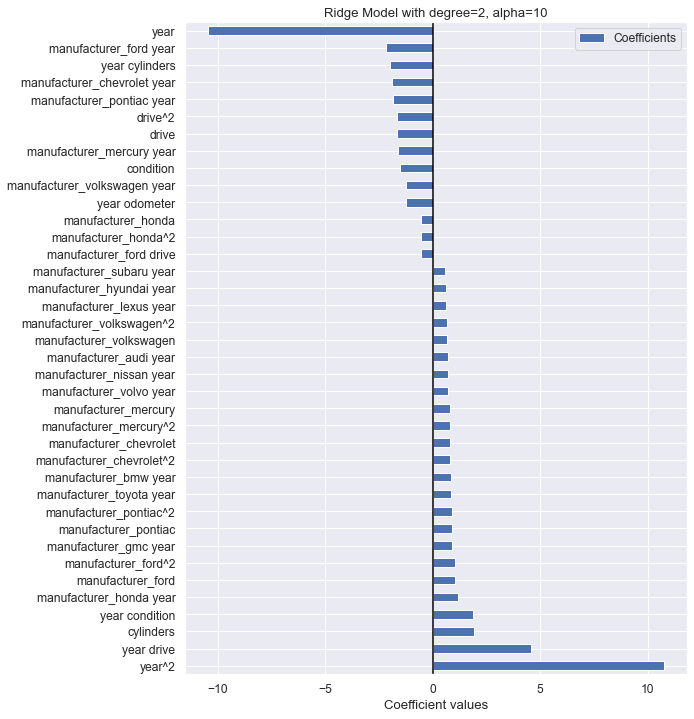

In [125]:
# plot coefficients
coefs[abs(coefs['Coefficients'])>0.5].plot.barh(figsize=(9, 12))
plt.title("Ridge Model with degree=2, alpha=10")
plt.axvline(x=0, color="black")
plt.xlabel("Coefficient values")

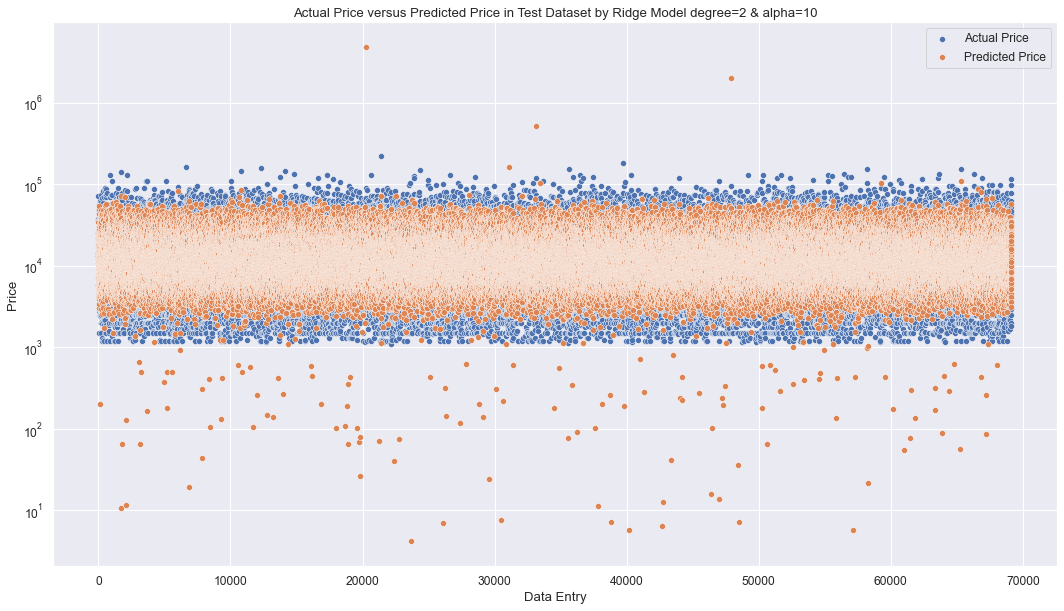

In [126]:
# visualize predicted results
plt.subplots(figsize=(18,10))
splot = sns.scatterplot( x=range(0,len(y_test)), y=y_test, label='Actual Price' )
splot = sns.scatterplot( x=range(0,len(y_test)), y=pipe.predict(X_test[features_list]), label='Predicted Price' )
splot.set(yscale="log")
plt.title('Actual Price versus Predicted Price in Test Dataset by Ridge Model degree=2 & alpha=10')
plt.xlabel('Data Entry')
plt.ylabel('Price')
plt.show()

Model execution performance has increased but also mean squared error has incresed

In [127]:
#vehicles[vehicles['odometer'] < 1000]['condition'].value_counts()

In [128]:

# vehicles.loc[vehicles['condition'] == 'new', 'condition'] = 1
# vehicles.loc[vehicles['condition'] == 'like new', 'condition'] = 2
# vehicles.loc[vehicles['condition'] == 'excellent', 'condition'] = 3
# vehicles.loc[vehicles['condition'] == 'good', 'condition'] = 4
# vehicles.loc[vehicles['condition'] == 'clean', 'condition'] = 5
# vehicles.loc[vehicles['condition'] == 'fair', 'condition'] = 6
# vehicles.loc[vehicles['condition'] == 'salvage', 'condition'] = 7

#vehicles[vehicles['condition'] == 7]

#### LASSO Model

In [129]:
%%time
# LASSO
features = X_train[features_list].select_dtypes(exclude=np.number).columns
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough" )

pipe = Pipeline([('transformer', ohe_step),
                 ('polyfeatures', PolynomialFeatures(degree = 2, include_bias = True)),
                 ('scaler', StandardScaler(with_mean=False)),
                 ('ttregressor', TransformedTargetRegressor(func=np.log1p,
                                                            inverse_func=np.expm1,
                                                            regressor=Lasso(alpha = 0.01, random_state = 93,
                                                                            max_iter=1000, tol=0.1))) ])
#fit on train
pipe.fit(X_train[features_list], y_train)
lasso_train_mse = mean_squared_error(y_train, pipe.predict(X_train[features_list]))
lasso_test_mse = mean_squared_error(y_test, pipe.predict(X_test[features_list]))
lasso_train_mae = mean_absolute_error(y_train, pipe.predict(X_train[features_list]))
lasso_test_mae = mean_absolute_error(y_test, pipe.predict(X_test[features_list]))

print('Train MSE:', lasso_train_mse)
print('Test MSE :', lasso_test_mse)
print('Train MAE:', lasso_train_mae)
print('Test MAE :', lasso_test_mae)
print('Score    :', pipe.score(X_test[features_list], y_test))

Train MSE: 6936256702.526685
Test MSE : 99556758.91019545
Train MAE: 6240.7636403059105
Test MAE : 6038.341641914058
Score    : 0.46688930889454683
CPU times: user 5.11 s, sys: 200 ms, total: 5.31 s
Wall time: 1.92 s


In [130]:
# get all transformed feature names
transformed_features = pipe.named_steps['transformer'].get_feature_names_out(X_train[features_list].columns)
# remove 'onehotencoder' and 'remainder' prefixes for readability
transformed_features = [str.split(x, sep = '__')[1] for x in transformed_features]
# build feature names
feature_names = pipe.named_steps['polyfeatures'].get_feature_names_out(transformed_features)

# build a coefficient list to visualize
coefs = pd.DataFrame(
    pipe.named_steps['ttregressor'].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
).sort_values(by='Coefficients', ascending=False)
coefs[coefs['Coefficients'] != 0]

Coefficients
odometer^2                        0.368993
year                              0.260036
cylinders                         0.224731
drive                             0.121206
manufacturer_dodge drive          0.037342
...                                    ...
manufacturer_nissan odometer     -0.025065
manufacturer_saturn              -0.025511
odometer region                  -0.118952
odometer condition               -0.155730
odometer                         -0.258333

[99 rows x 1 columns]

Text(0.5, 0, 'Coefficient values')

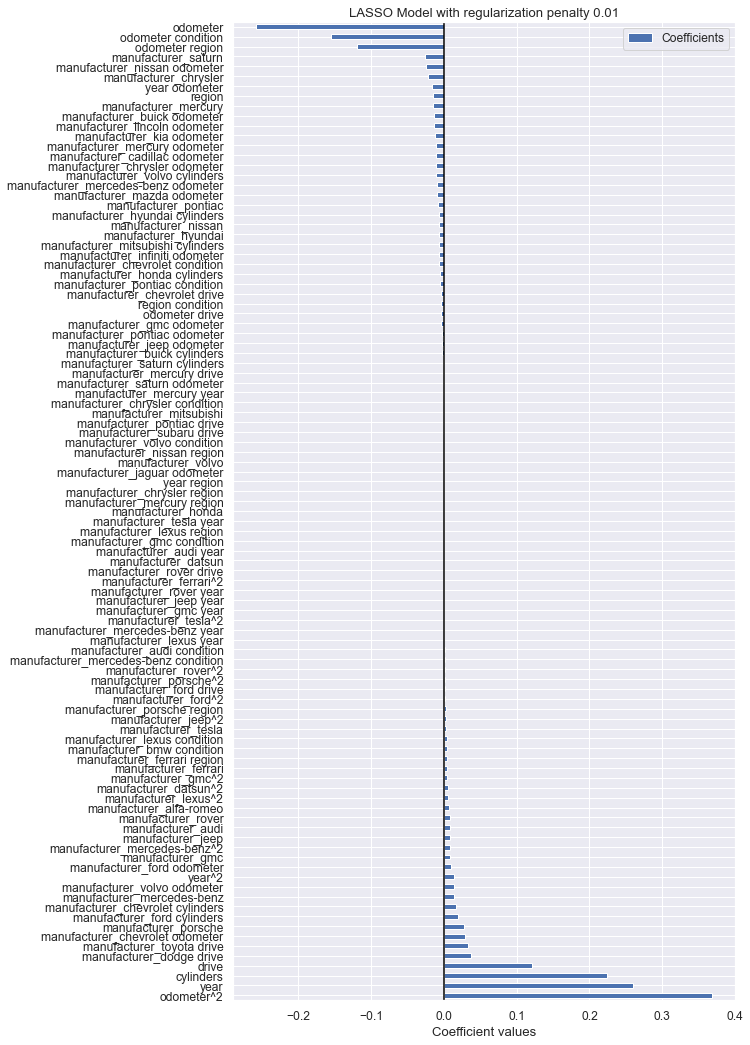

In [131]:
# plot coefficients
coefs[coefs['Coefficients'] != 0].plot.barh(figsize=(9, 18))
plt.title("LASSO Model with regularization penalty 0.01")
plt.axvline(x=0, color="black")
plt.xlabel("Coefficient values")

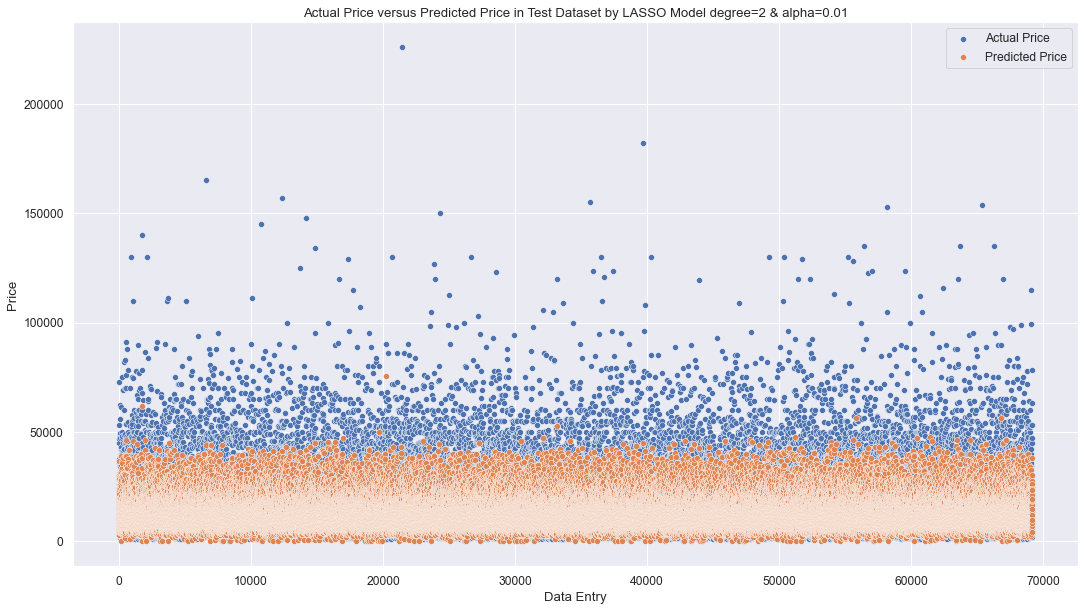

In [132]:
# visualize predicted results
plt.subplots(figsize=(18,10))
splot = sns.scatterplot( x=range(0,len(y_test)), y=y_test, label='Actual Price' )
splot = sns.scatterplot( x=range(0,len(y_test)), y=pipe.predict(X_test[features_list]), label='Predicted Price' )
#splot.set(yscale="log")
plt.title('Actual Price versus Predicted Price in Test Dataset by LASSO Model degree=2 & alpha=0.01')
plt.xlabel('Data Entry')
plt.ylabel('Price')
plt.show()

#### Linear Regression

In [133]:
# LinearRegression
features = features = X_train[features_list].select_dtypes(exclude=np.number).columns
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough" )

pipe = Pipeline([('transformer', ohe_step),
                 ('polyfeatures', PolynomialFeatures(degree = 2, include_bias = True)),
                 ('scaler', StandardScaler(with_mean=False)),
                 ('ttregressor', TransformedTargetRegressor(func=np.log1p,
                                                            inverse_func=np.expm1,
                                                            regressor=LinearRegression())) ])
#fit on train
pipe.fit(X_train[features_list], y_train)
lr_train_mse = mean_squared_error(y_train, pipe.predict(X_train[features_list]))
lr_test_mse = mean_squared_error(y_test, pipe.predict(X_test[features_list]))
lr_train_mae = mean_absolute_error(y_train, pipe.predict(X_train[features_list]))
lr_test_mae = mean_absolute_error(y_test, pipe.predict(X_test[features_list]))

print('Train MSE:', lr_train_mse)
print('Test MSE :', lr_test_mse)
print('Train MAE:', lr_train_mae)
print('Test MAE :', lr_test_mae)
print('Score    :', pipe.score(X_test[features_list], y_test))

Train MSE: 15402186254.934015
Test MSE : 2818825118.0284166
Train MAE: 5073.481708226705
Test MAE : 4991.963823327703
Score    : -14.09436248455097


In [134]:
# get all transformed feature names
transformed_features = pipe.named_steps['transformer'].get_feature_names_out(X_train[features_list].columns)
# remove 'onehotencoder' and 'remainder' prefixes for readability
transformed_features = [str.split(x, sep = '__')[1] for x in transformed_features]
# build feature names
feature_names = pipe.named_steps['polyfeatures'].get_feature_names_out(transformed_features)

# build a coefficient list to visualize
coefs = pd.DataFrame(
    pipe.named_steps['ttregressor'].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
).sort_values(by='Coefficients', ascending=False)
coefs[abs(coefs['Coefficients'])>2]

Coefficients
year^2                           48.976793
year drive                       14.215363
year condition                    9.682749
cylinders                         9.207608
manufacturer_audi year            8.830973
...                                    ...
manufacturer_volkswagen year     -8.782750
condition                        -8.846220
manufacturer_jeep year           -9.293239
year cylinders                   -9.641894
year                            -48.640995

[67 rows x 1 columns]

Text(0.5, 0, 'Coefficient values')

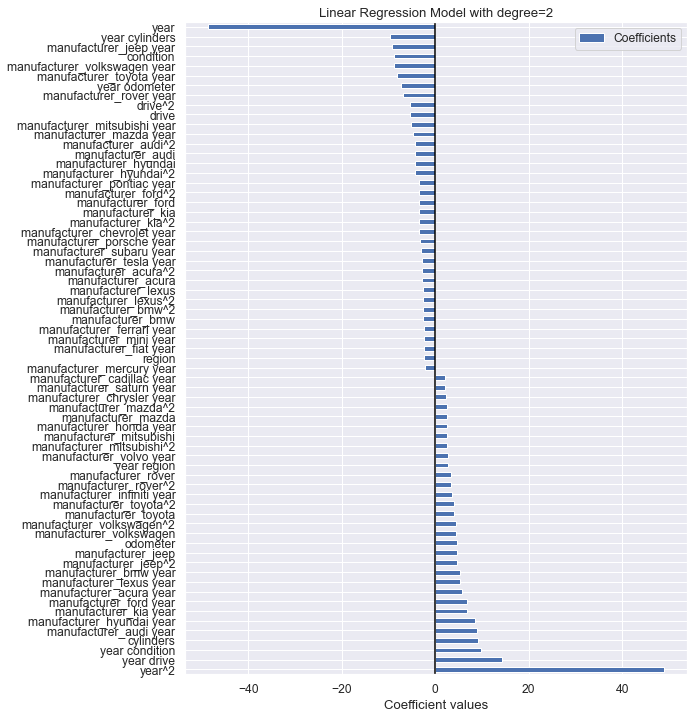

In [135]:
# plot significant coefficients!
coefs[abs(coefs['Coefficients'])>2].plot.barh(figsize=(9, 12))
plt.title("Linear Regression Model with degree=2")
plt.axvline(x=0, color="black")
plt.xlabel("Coefficient values")

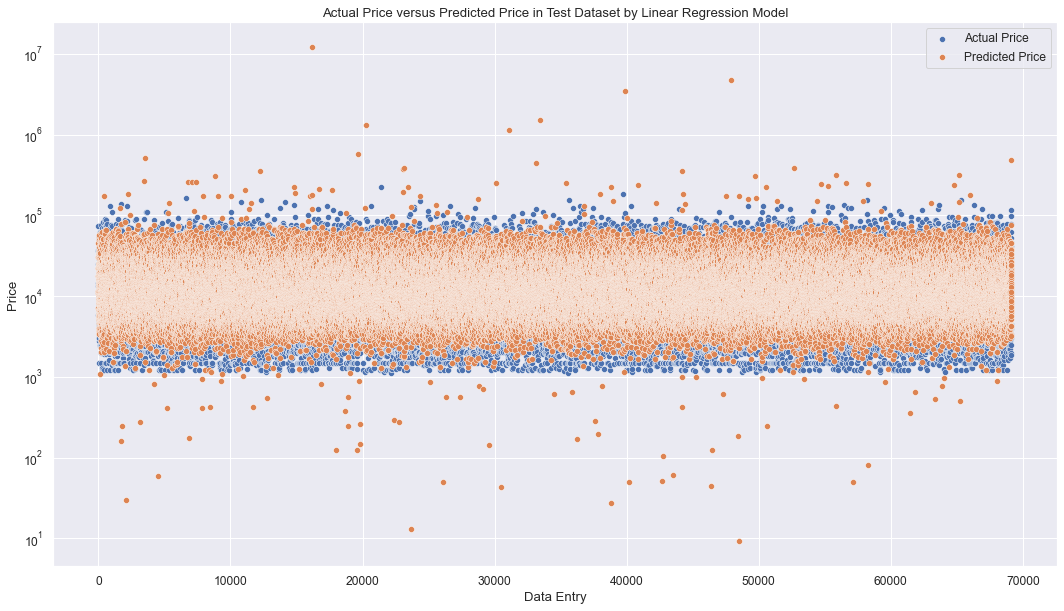

In [136]:
# visualize predicted results
plt.subplots(figsize=(18,10))
splot = sns.scatterplot( x=range(0,len(y_test)), y=y_test, label='Actual Price' )
splot = sns.scatterplot( x=range(0,len(y_test)), y=pipe.predict(X_test[features_list]), label='Predicted Price' )
splot.set(yscale="log")
plt.title('Actual Price versus Predicted Price in Test Dataset by Linear Regression Model')
plt.xlabel('Data Entry')
plt.ylabel('Price')
plt.show()

#### Linear Regression with Feature selection by LASSO

In [137]:
%%time
# Linear Regression with Feature selection by LASSO
features = features = X_train[features_list].select_dtypes(exclude=np.number).columns
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough" )

pipe = Pipeline([('transformer', ohe_step),
               ('polyfeatures', PolynomialFeatures(degree = 2, include_bias = True)),
               ('scaler', StandardScaler(with_mean=False)),
               ('selector', SelectFromModel(Lasso(alpha = 0.01, random_state = 93, max_iter=500, tol=0.3))),
               ('ttregressor', TransformedTargetRegressor(func=np.log1p,
                                                    inverse_func=np.expm1,
                                                    regressor=LinearRegression()))
              ])
#fit on train
pipe.fit(X_train[features_list], y_train)
lr_w_lasso_train_mse = mean_squared_error(y_train, pipe.predict(X_train[features_list]))
lr_w_lasso_test_mse = mean_squared_error(y_test, pipe.predict(X_test[features_list]))
lr_w_lasso_train_mae = mean_absolute_error(y_train, pipe.predict(X_train[features_list]))
lr_w_lasso_test_mae = mean_absolute_error(y_test, pipe.predict(X_test[features_list]))

print('Train MSE:', lr_w_lasso_train_mse)
print('Test MSE :', lr_w_lasso_test_mse)
print('Train MAE:', lr_w_lasso_train_mae)
print('Test MAE :', lr_w_lasso_test_mae)
print('Score    :', pipe.score(X_test[features_list], y_test))

Train MSE: 15548389607.014174
Test MSE : 2285976998.1638727
Train MAE: 5074.549073772776
Test MAE : 4969.47244477866
Score    : -11.24104511519517
CPU times: user 1min 5s, sys: 797 ms, total: 1min 6s
Wall time: 9.6 s


In [138]:
# get all transformed feature names
transformed_features = pipe.named_steps['transformer'].get_feature_names_out(X_train[features_list].columns)
# remove 'onehotencoder' and 'remainder' prefixes for readability
transformed_features = [str.split(x, sep = '__')[1] for x in transformed_features]
# build feature names
poly_feature_names = pipe.named_steps['polyfeatures'].get_feature_names_out(transformed_features)
# selector feature names
feature_names = pipe.named_steps['selector'].get_feature_names_out(poly_feature_names)
#feature_names.shape

# build a coefficient list to visualize
coefs = pd.DataFrame(
    pipe.named_steps['ttregressor'].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
).sort_values(by='Coefficients', ascending=False)
coefs

Coefficients
year^2                           49.016694
year drive                       14.282610
year condition                    9.688878
cylinders                         9.258939
manufacturer_audi year            8.906457
...                                    ...
manufacturer_volkswagen year     -8.764011
condition                        -8.852154
manufacturer_jeep year           -9.260764
year cylinders                   -9.697139
year                            -48.681187

[344 rows x 1 columns]

Text(0.5, 0, 'Coefficient values')

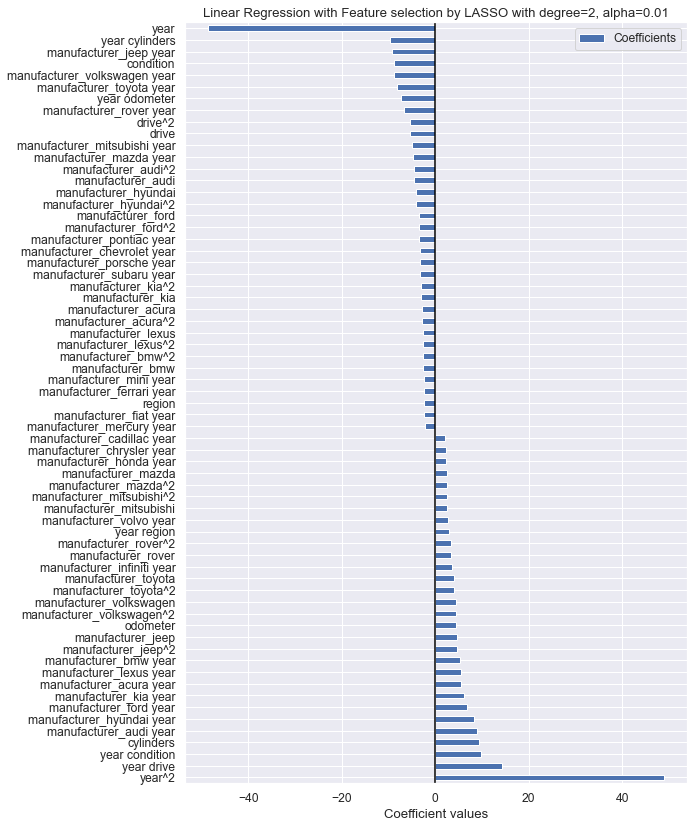

In [139]:
# plot coefficients
coefs[abs(coefs['Coefficients']) > 2].plot.barh(figsize=(9, 14))
plt.title("Linear Regression with Feature selection by LASSO with degree=2, alpha=0.01")
plt.axvline(x=0, color="black")
plt.xlabel("Coefficient values")

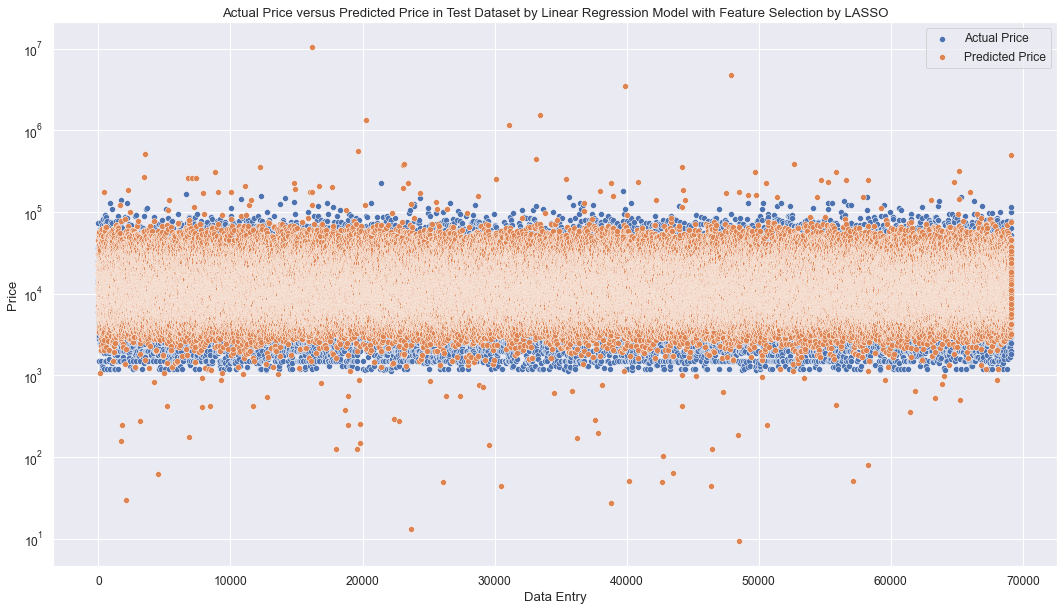

In [140]:
# visualize predicted results
plt.subplots(figsize=(18,10))
splot = sns.scatterplot( x=range(0,len(y_test)), y=y_test, label='Actual Price' )
splot = sns.scatterplot( x=range(0,len(y_test)), y=pipe.predict(X_test[features_list]), label='Predicted Price' )
splot.set(yscale="log")
plt.title('Actual Price versus Predicted Price in Test Dataset by Linear Regression Model with Feature Selection by LASSO')
plt.xlabel('Data Entry')
plt.ylabel('Price')
plt.show()

### Display Comparison of Model Executions

The Model that minimized Test Error was: 2
CPU times: user 23 ms, sys: 3 ms, total: 26 ms
Wall time: 23.1 ms


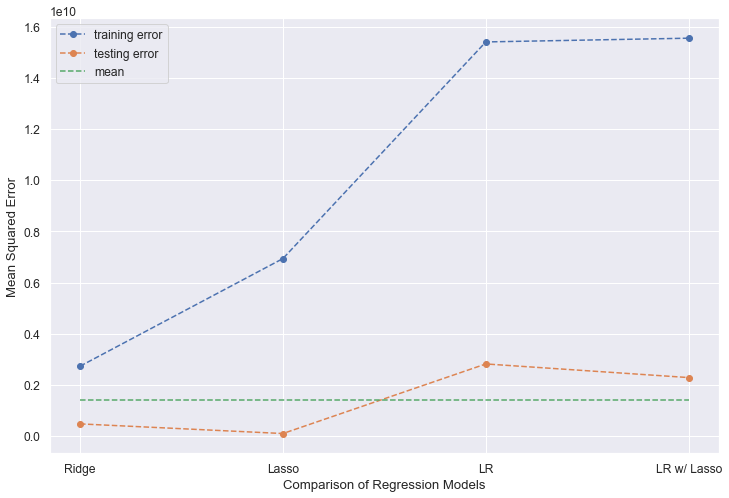

In [141]:
%%time
# Compare all 4 MSE results!
test_mses = [ridge_test_mse, lasso_test_mse, lr_test_mse, lr_w_lasso_test_mse]
train_mses = [ridge_train_mse, lasso_train_mse, lr_train_mse, lr_w_lasso_train_mse]
print(f'The Model that minimized Test Error was: {test_mses.index(min(test_mses)) + 1}')
plt.subplots(figsize=(12,8))
plt.plot(range(1, 5), train_mses, '--o', label = 'training error')
plt.plot(range(1, 5), test_mses, '--o', label = 'testing error')
plt.plot(range(1, 5), [np.mean(test_mses)]*4, '--', label = 'mean')
plt.xticks(range(1, 5), ['Ridge', 'Lasso', 'LR', 'LR w/ Lasso'])
plt.xlabel('Comparison of Regression Models')
plt.ylabel('Mean Squared Error')
plt.legend()

The Model that minimized Test Error was: 4
CPU times: user 21.9 ms, sys: 2.15 ms, total: 24.1 ms
Wall time: 22.6 ms


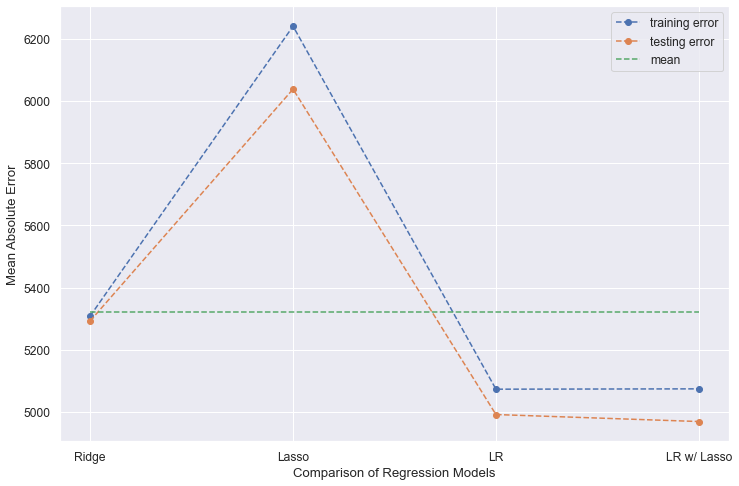

In [142]:
%%time
# Compare all 4 MAE results!
test_maes = [ridge_test_mae, lasso_test_mae, lr_test_mae, lr_w_lasso_test_mae]
train_maes = [ridge_train_mae, lasso_train_mae, lr_train_mae, lr_w_lasso_train_mae]
print(f'The Model that minimized Test Error was: {test_maes.index(min(test_maes)) + 1}')
plt.subplots(figsize=(12,8))
plt.plot(range(1, 5), train_maes, '--o', label = 'training error')
plt.plot(range(1, 5), test_maes, '--o', label = 'testing error')
plt.plot(range(1, 5), [np.mean(test_maes)]*4, '--', label = 'mean')
plt.xticks(range(1, 5), ['Ridge', 'Lasso', 'LR', 'LR w/ Lasso'])
plt.xlabel('Comparison of Regression Models')
plt.ylabel('Mean Absolute Error')
plt.legend()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Among all models, Linear Regression with feature selection by Lasso performed best in terms of mean absolute errors. There may be some improvements can be done by picking more features to execute models, however, those features picked for modelling are good, improvements should be considered in later phases.

Mission critical steps were completed for, data cleaning, transforming and exploration in this phase.

Decent model was created to predict price of a used car, imprtant features of a used card were identified.

Used Car Pricing Evaluation 
I decided to include region and condition to categorize properly even though the attribute importance thinks differently per evaluation steps to influence models with more appropriate features. It helped slightly with models’ mean absolute errors. 

I build 4 regression models Linear Regression with LASSO feature selection outperformed others in mean absolute error:
![](images/trainingerror.png)


The model Linear Regression with LASSO feature selection outperformed all others, the model generated and kept only 344 feature degree=2 combinations.
![](images/Coefficients.png)

Condition is shown as a negative influencer in above and below charts:
![](images/CoefficientsValues.png)


The comparison of actual and predicted price shown in the below image for visualization:
![](images/ActualversusPredictedFeatureSelectionbyLASSO.png)
￼
Region assignment may need to be reevaluated in later phases as a side note.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Report

Based on the research, the influential features of a used vehicle can be narrowed down to these:
- Year
- Cylinders
- Condition
- Drivetrain
- Region
- Odometer

Remarks about positive price points:
- New vehicles are high priced at the square power of year
- The product of year and drive influence higher price
- The product of year and condition influence higher price
- The product of year and region influence higher price
- Number of cylinders influence higher price
- The coefficient of year and along manufacturer influence higher price
- Manufacturers Volkswagen, Jeep, Rover, Mitsubishi, Mazda, Honda, Chrysler and Cadillac influence higher price.

Remarks about negative price points:
- Higher odometer reading on newer models penalize price, as condition worsens lower the price. 
- Manufacturers BMW, Lexus, Acura, Kia, Ford, Hyundai and Audi tend to have lower prices.
